<a href="https://colab.research.google.com/github/Uditsingh7/Machine_Learning_Projects/blob/main/Udit_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction

### Problem Statement¶

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:



```
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
```

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.



## Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing the necessary libraries
# numpy is a fundamental package for numerical computing in Python, providing support for arrays and mathematical functions.
import numpy as np
# pandas is a powerful library for data manipulation and analysis, offering data structures like DataFrames.
import pandas as pd
# matplotlib.pyplot is a plotting library used for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt
# seaborn is a data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

### Step 1:
Reading and Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
cars = pd.read_csv('./CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Step 2 : Data Cleaning and Preparation

In [7]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#Splitting company name from CarName column
# Check if 'CarName' column exists before processing
if 'CarName' in cars.columns:
    # Extract the first word of the 'CarName' column to create a new 'CompanyName' column.
    # The lambda function splits each string in 'CarName' by space and takes the first element.
    CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
    # Insert the newly created 'CompanyName' Series into the DataFrame 'cars' at index 3.
    cars.insert(3,"CompanyName",CompanyName)
    # Drop the original 'CarName' column from the DataFrame as it's no longer needed.
    # 'axis=1' specifies that a column should be dropped, and 'inplace=True' modifies the DataFrame directly.
    cars.drop(['CarName'],axis=1,inplace=True)

# Display the first 5 rows of the modified DataFrame to show the changes.
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Fixing invalid values
There seems to be some spelling error in the CompanyName column.

maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

In [10]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [12]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Step 3: Visualizing the data

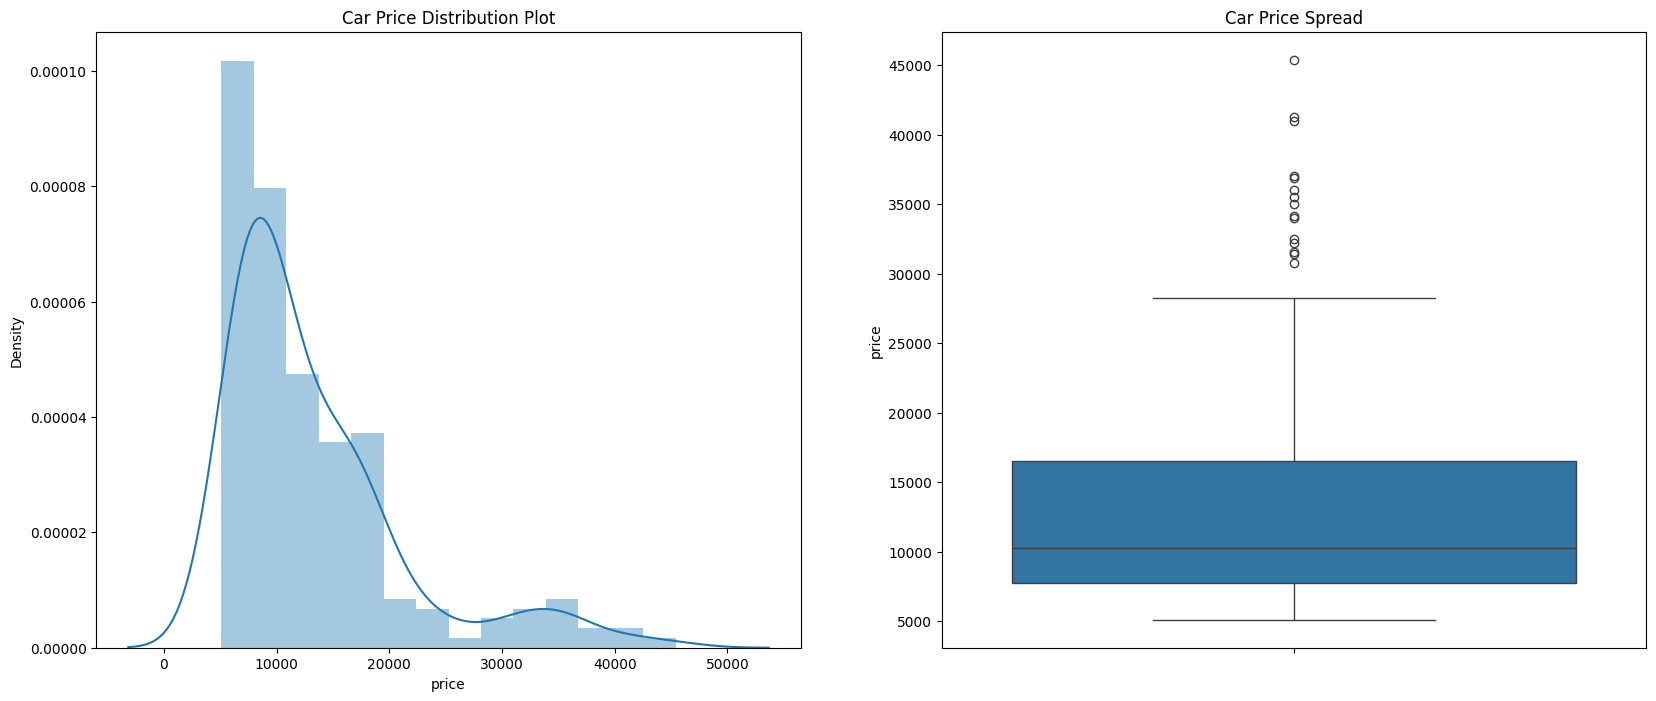

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()
# Summary: The plots indicate that most cars are in the lower price range (around $5k-$10k), with a few high-priced outliers significantly impacting the spread.
# This distribution is 'right-skewed', meaning most prices are low, but a few high values pull the average up, creating a long tail to the right.

In [14]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))
# Explanation of output:
# count: Number of cars (205).
# mean: Average price (~$13,276).
# std: Price variability.
# min: Lowest price ($5,118).
# 25% (1st Quartile): 25% of cars are priced at or below $7,788.
# 50% (Median): 50% of cars are priced at or below $10,295.
# 75% (3rd Quartile): 75% of cars are priced at or below $16,503.
# 85%, 90%: Respectively, 85% and 90% of cars are below these price points.
# max: Highest price ($45,400).

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Inference :
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.

Step 3.1 : Visualising Categorical Data

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

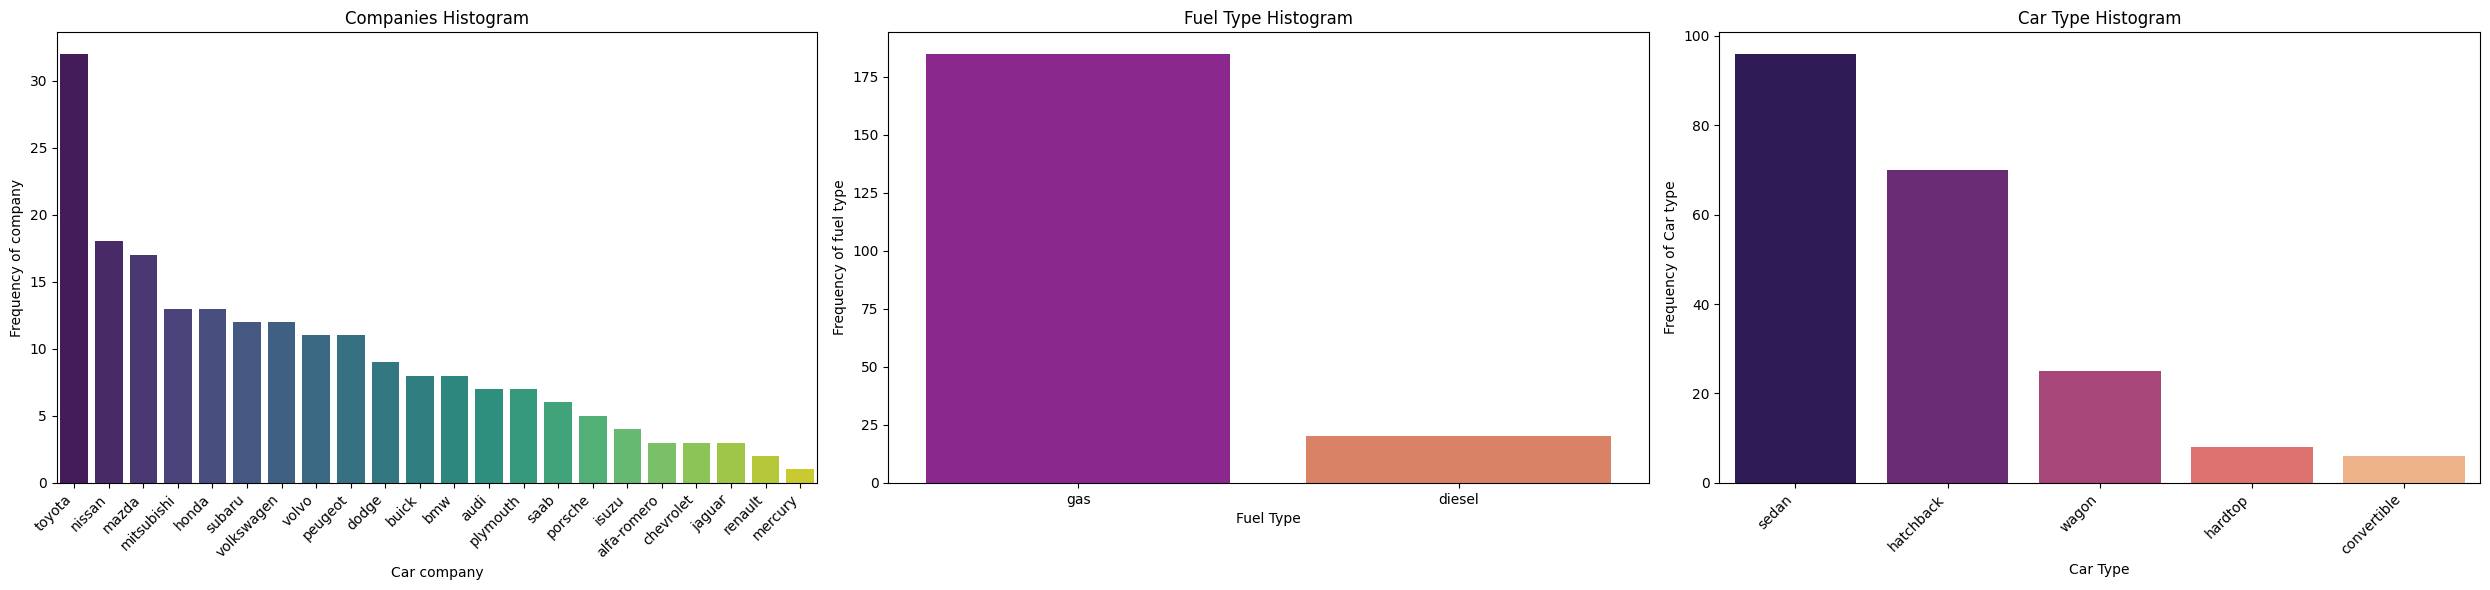

In [15]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
sns.countplot(x='CompanyName', data=cars, palette='viridis', order=cars['CompanyName'].value_counts().index)
plt.title('Companies Histogram')
plt.xlabel('Car company')
plt.ylabel('Frequency of company')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
# Analysis: Toyota, Nissan, and Mazda are the most frequent car companies in the dataset.

plt.subplot(1,3,2)
sns.countplot(x='fueltype', data=cars, palette='plasma', order=cars['fueltype'].value_counts().index)
plt.title('Fuel Type Histogram')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency of fuel type')
# Analysis: The dataset is predominantly composed of 'gas' (gasoline) fueltype cars.

plt.subplot(1,3,3)
sns.countplot(x='carbody', data=cars, palette='magma', order=cars['carbody'].value_counts().index)
plt.title('Car Type Histogram')
plt.xlabel('Car Type')
plt.ylabel('Frequency of Car type')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
# Analysis: 'sedan' and 'hatchback' are the most common car body types.

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Inference :
1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel.
3. sedan is the top car type prefered.

Text(0, 0.5, 'Price')

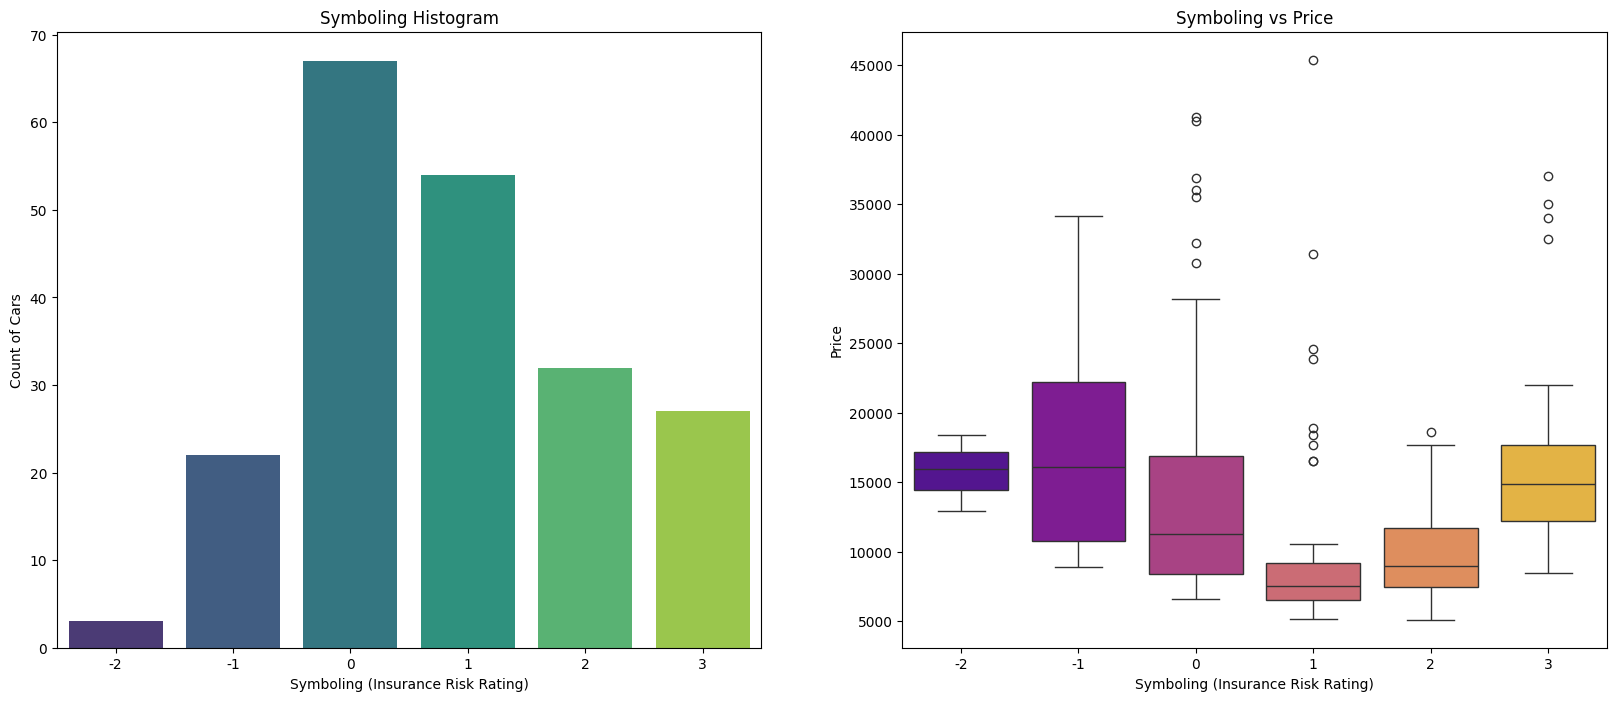

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x=cars.symboling, palette='viridis') # Using 'viridis' palette for better distinction
plt.xlabel('Symboling (Insurance Risk Rating)')
plt.ylabel('Count of Cars')
# Summary: This histogram shows the frequency of different insurance risk ratings ('symboling') in the dataset.
# 'Symboling' values range from -3 to +3.
# -3 and -2: Very safe cars (lower insurance risk, generally 'better').
# 0, 1, 2: Average to slightly above-average risk.
# 3: Much riskier cars (higher insurance risk, generally 'worse').
# Most cars in this dataset fall into the 0, 1, and 2 categories, indicating a prevalence of average-risk vehicles.
# This distribution highlights the common risk profiles present in the market represented by the dataset.

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette='plasma') # Using 'plasma' palette for the boxplot
plt.xlabel('Symboling (Insurance Risk Rating)')
plt.ylabel('Price')
# Summary: This boxplot illustrates the relationship between car insurance risk rating (symboling) and price.
# What each number means:
# -3, -2, -1: Indicate lower risk. Cars in these categories often have lower median prices and narrower price ranges, suggesting they are safer and potentially more 'economical' choices.
# 0, 1: Represent average risk. These categories have a wide price spread, covering a significant portion of the market.
# 2, 3: Indicate higher risk. Cars with symboling 2 and 3 tend to exhibit higher median prices and a much broader price range, including some of the most expensive vehicles. This suggests that higher-risk cars might often be performance-oriented or luxury models.
# Low vs. High better/worse: Lower/negative symboling scores are 'better' from an insurance risk perspective (cheaper to insure). Higher positive scores are 'worse' (more expensive to insure).
# Price range per score: For instance, symboling -1 has a relatively high price floor, while symboling 3 shows a very high price ceiling, indicating cars with high risk can be very expensive.
# Implications for car price prediction: 'Symboling' is a significant categorical feature. It reveals that risk perception (often tied to car features like performance, type, and age) is correlated with car price. Models predicting car price should consider 'symboling' as a valuable predictor, as it helps segment cars into different value brackets based on their inherent risk profile. Cars with higher perceived risk often command higher prices, implying factors contributing to risk (e.g., power, sportiness) also drive up cost.

### Understanding 'Symboling'

The `symboling` column in the dataset represents an assigned insurance risk rating. Cars are initially assigned a value of 0, and then for each degree of risk increase, a +1 is added, and for each degree of risk decrease, a -1 is subtracted.

*   **Higher positive values (e.g., +3)** indicate a much riskier car (more likely to be involved in an accident or be more expensive to insure).
*   **Negative values (e.g., -3)** indicate a very safe car (less risky, cheaper to insure).
*   **Values around 0 or 1** represent cars with average risk.

Now, let's look at how this risk factor distributes among the cars and how it relates to their prices.

### Inference :
It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

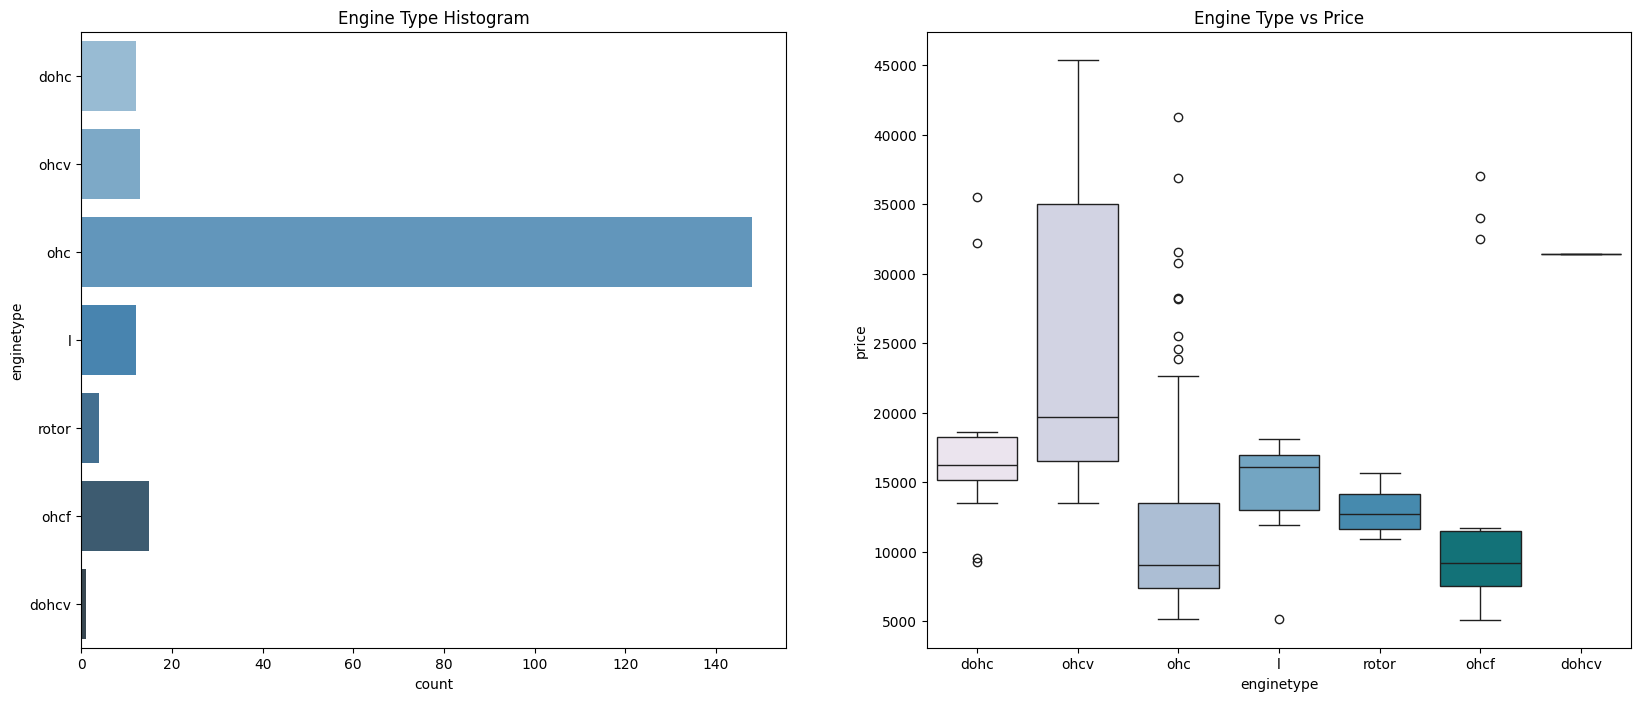

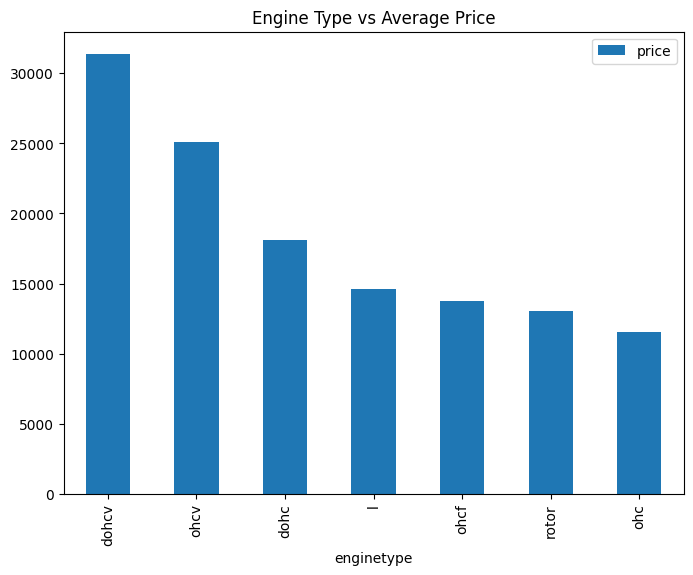

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

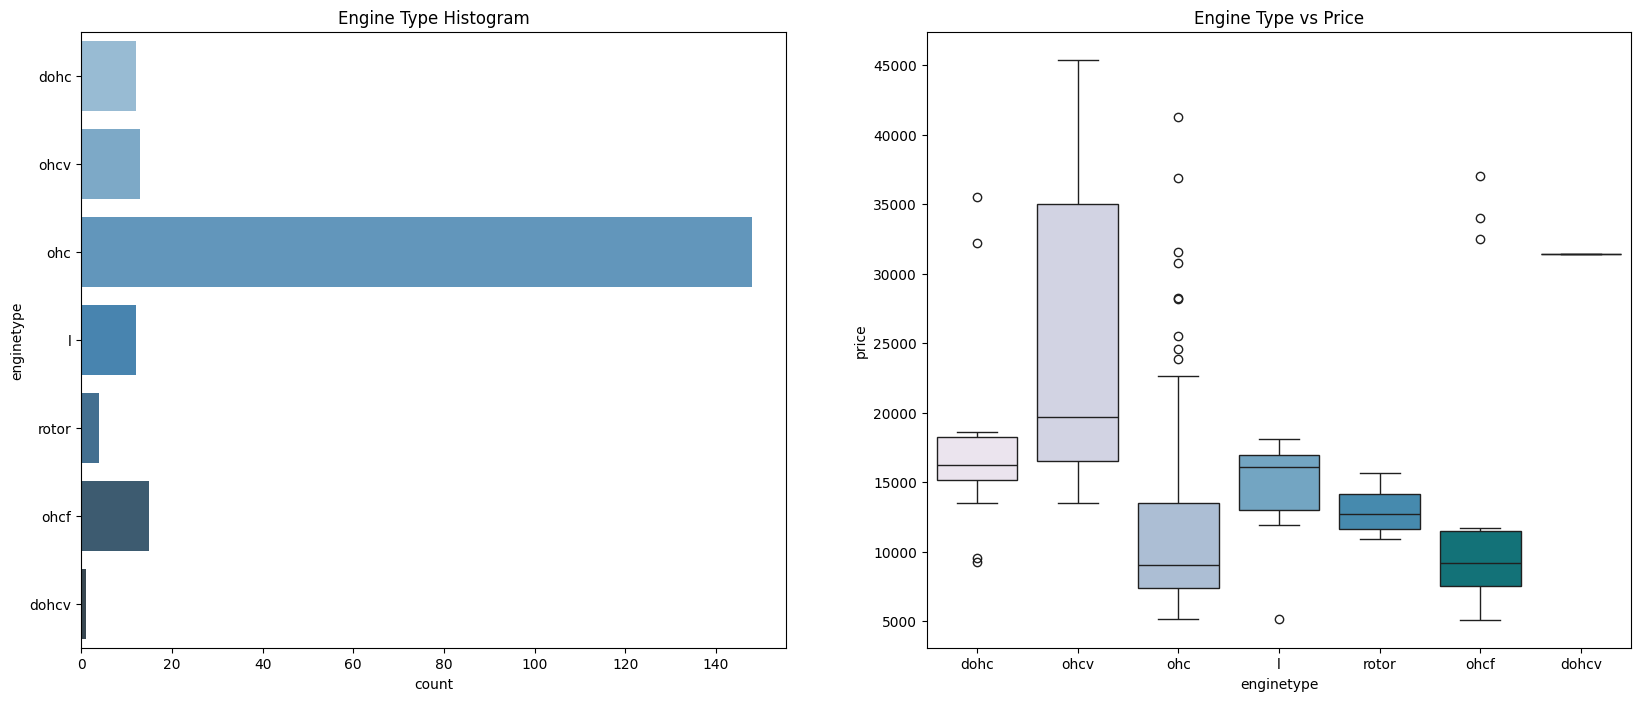

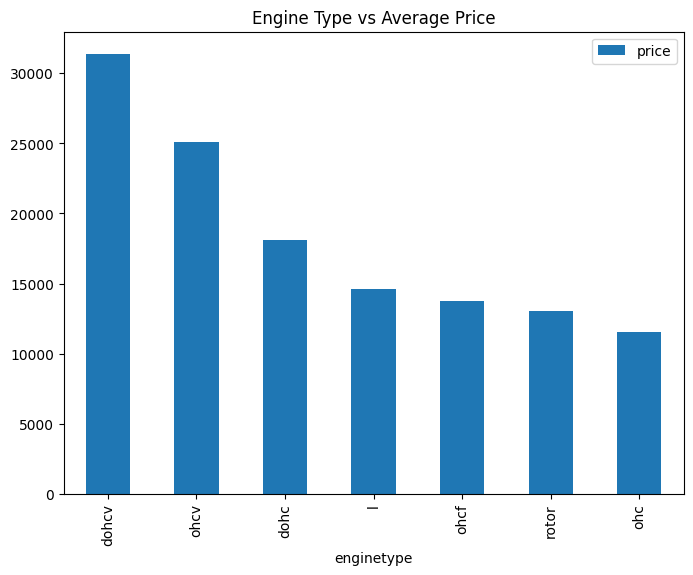

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))
# Explanation for Engine Type Histogram:
# What it shows: This plot displays the frequency of each engine type present in our dataset.
# Relation to dataset: It tells us which engine types are most common (e.g., 'ohc') and which are rare (e.g., 'dohcv').
# Relation to price prediction: Understanding the prevalence of each engine type helps in data preprocessing (e.g., one-hot encoding for categorical features). If a certain engine type is very rare, its impact on the model might be limited or require special handling. It hints at what features might dominate the dataset.
# Use case in ML pipeline: This is part of Exploratory Data Analysis (EDA) to understand feature distribution. It helps identify potential data imbalances or categories that might need grouping or special encoding before model training.

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))
plt.show()
# Explanation for Engine Type vs Price Boxplot:
# What it shows: This plot illustrates the distribution of car prices for each distinct engine type. Each box represents the interquartile range of prices, with a line for the median.
# Relation to dataset: It directly reveals how car prices vary across different engine types. For instance, 'dohcv' or 'ohcv' engine types might show significantly higher median prices and broader price ranges compared to 'ohc'.
# Relation to price prediction: This plot is crucial for identifying 'EngineType' as a potentially strong predictor of car price. If certain engine types consistently correlate with higher or lower prices, the ML model can learn this relationship effectively. It helps determine if 'EngineType' is a relevant feature for our regression task.
# Use case in ML pipeline: This is a key step in feature selection and engineering during EDA. It provides visual evidence for including 'enginetype' as a significant categorical feature in the model, as it clearly shows its influence on the target variable (price). It can also guide decisions on how to encode this categorical variable.

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()
# Explanation for Engine Type vs Average Price Bar Plot:
# What it shows: This bar plot visually represents the average price for each engine type, sorted from highest to lowest average price.
# Relation to dataset: It provides a clear, quantitative summary of which engine types are associated with higher average car prices.
# Relation to price prediction: This is a direct and concise way to see the predictive power of 'enginetype'. Engine types with significantly different average prices are strong indicators for a model to use in price prediction. For example, 'dohcv' cars have the highest average price, suggesting it's a premium engine type.
# Use case in ML pipeline: Complements the boxplot by giving a simple average comparison. It helps reinforce the decision to use 'enginetype' as a feature, and its sorted nature gives a quick ranking of engine types by price influence. It's a quick check for linearity in a potential categorical-to-numerical relationship.

### Inference :

1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 2500x600 with 0 Axes>

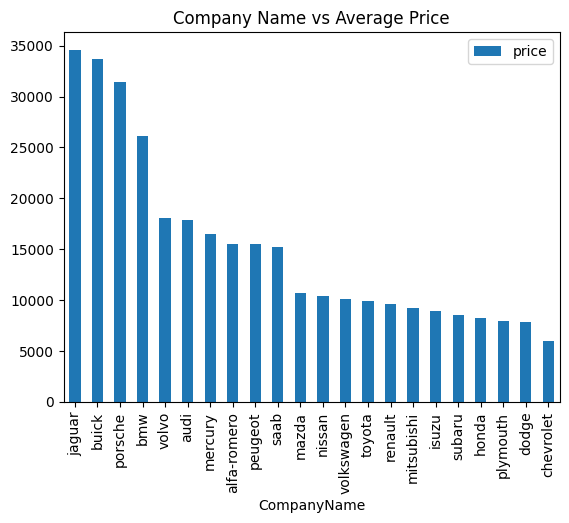

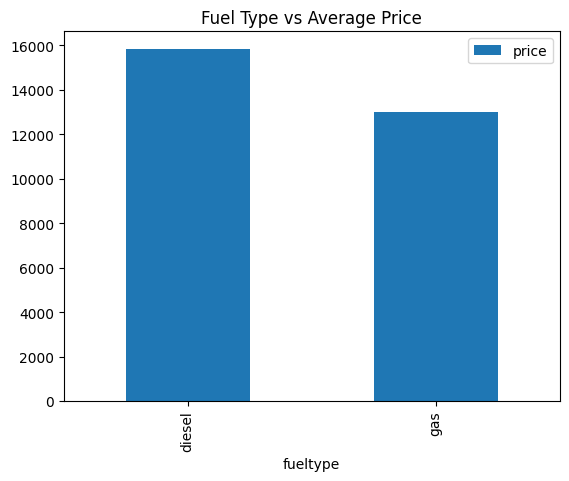

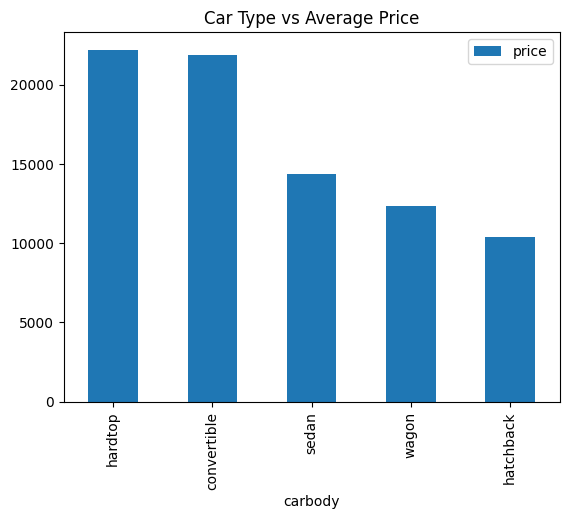

In [19]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()
# Explanation for Company Name vs Average Price Bar Plot:
# What it shows: This plot displays the average price of cars for each manufacturing company, sorted from the most expensive average to the least.
# Relation to dataset: It clearly highlights which car companies generally produce more expensive vehicles on average within our dataset (e.g., Porsche, Jaguar) and which produce more affordable ones (e.g., Chevrolet, Dodge).
# Relation to price prediction: This is a strong indicator of the predictive power of the 'CompanyName' feature. A car's manufacturer is often a primary driver of its price, and this plot provides direct evidence of that relationship. A model can leverage this to assign higher prices to cars from premium brands.
# Use case in ML pipeline: Useful during feature engineering and selection to confirm 'CompanyName' as a significant categorical feature for price prediction. The ordered average prices can also inform how categorical variables might be encoded (e.g., target encoding) if a simple one-hot encoding proves insufficient.

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()
# Explanation for Fuel Type vs Average Price Bar Plot:
# What it shows: This plot illustrates the average price of cars based on their fuel type, sorted from highest to lowest average price.
# Relation to dataset: It shows whether cars running on 'gas' or 'diesel' tend to be more expensive on average. In our dataset, diesel cars appear to have a higher average price.
# Relation to price prediction: This feature can contribute to price prediction if there's a significant difference in average prices between fuel types. A model would learn to associate 'diesel' with potentially higher prices if this trend holds true.
# Use case in ML pipeline: Confirms 'fueltype' as a relevant feature. It's a binary categorical variable, so one-hot encoding will be straightforward, allowing the model to use this price difference.

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()
# Explanation for Car Type vs Average Price Bar Plot:
# What it shows: This plot compares the average price of cars for different car body types, sorted by average price.
# Relation to dataset: It reveals that certain car body types (e.g., hardtop, convertible) are associated with higher average prices, while others (e.g., hatchback) tend to have lower average prices in our dataset.
# Relation to price prediction: This plot demonstrates that 'carbody' is a valuable predictive feature. The type of car body significantly influences its market segment and, consequently, its price. Models can use this information to estimate prices based on the car's body style.
# Use case in ML pipeline: Essential for feature selection. As a categorical variable, it would likely be one-hot encoded, and its clear relationship with price shown here justifies its inclusion in the model for better predictive accuracy.

### Inference :
1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price

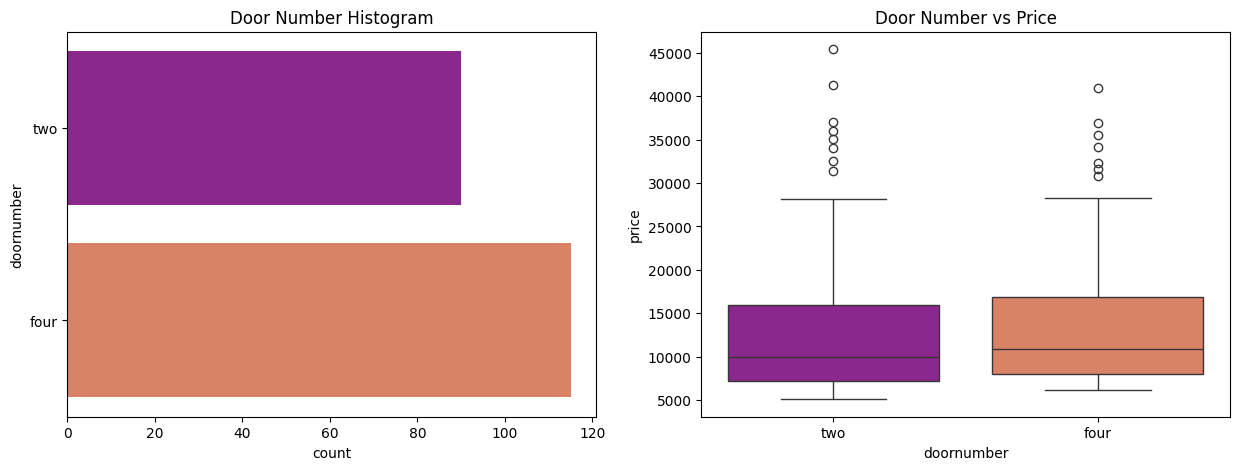

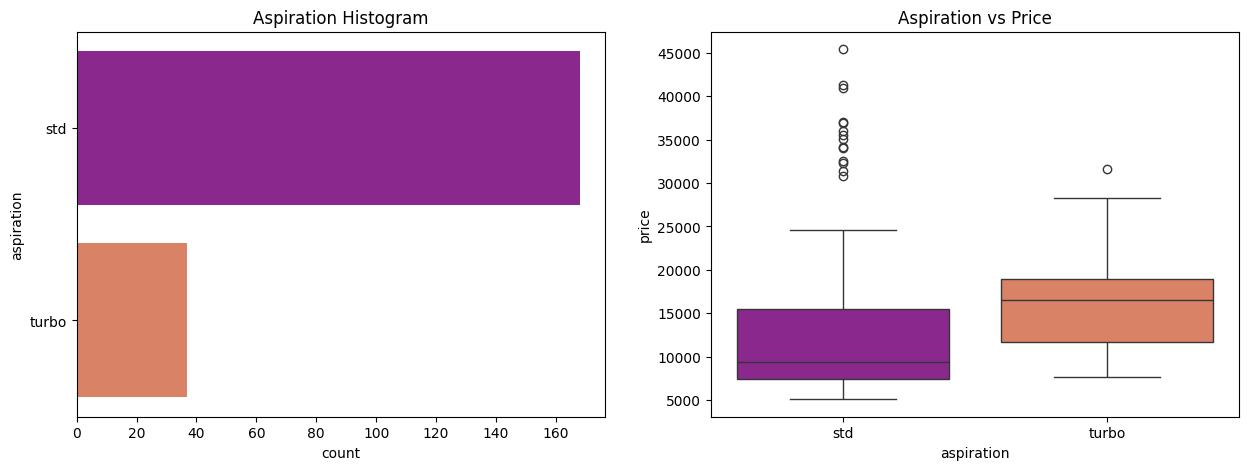

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))
# Explanation for Door Number Histogram:
# What it shows: This plot displays the frequency of cars based on the number of doors (two or four) in our dataset.
# Relation to dataset: It quickly tells us which door configurations are more common among the cars. In this dataset, there's a relatively even distribution, or one might slightly outnumber the other.
# Relation to price prediction: Understanding the distribution helps in recognizing the prevalence of certain car types. It's a categorical feature that might influence car price.
# Use case in ML pipeline: This is part of EDA to see the distribution of a categorical feature. It's a simple feature that will likely be one-hot encoded for model training.

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))
plt.show()
# Explanation for Door Number vs Price Boxplot:
# What it shows: This plot illustrates the distribution of car prices for 'two-door' and 'four-door' cars.
# Relation to dataset: It helps us see if cars with two doors typically have different price ranges or median prices compared to cars with four doors.
# Relation to price prediction: If there's a clear difference in price distribution between two-door and four-door cars, then 'doornumber' becomes a useful predictor. For example, two-door cars (often sportier) might have a higher average price or wider price spread.
# Use case in ML pipeline: Provides visual evidence for the predictive power of 'doornumber'. If a relationship exists, this categorical variable should be included in the model to improve accuracy.

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))
# Explanation for Aspiration Histogram:
# What it shows: This plot shows the count of cars based on their aspiration type (standard or turbo).
# Relation to dataset: It quickly reveals the prevalence of naturally aspirated vs. turbocharged engines in the dataset.
# Relation to price prediction: Aspiration type can impact engine performance and fuel efficiency, which are factors in car pricing. Most cars are 'std' (naturally aspirated), with 'turbo' being less common.
# Use case in ML pipeline: Part of EDA to understand feature distribution. As a binary categorical feature, it will likely be one-hot encoded for the model.

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))
plt.show()
# Explanation for Aspiration vs Price Boxplot:
# What it shows: This plot compares the price distribution of cars with 'std' (standard) aspiration against those with 'turbo' aspiration.
# Relation to dataset: It visually represents whether cars with turbochargers tend to be priced differently (higher or lower, or with different variability) than their naturally aspirated counterparts.
# Relation to price prediction: This plot is critical for determining if 'aspiration' is a strong predictor of car price. If 'turbo' cars consistently have higher prices, the model can learn this correlation.
# Use case in ML pipeline: Essential for feature selection. If 'turbo' cars show significantly different price distributions, this feature will be valuable for the regression model after appropriate encoding.

### Inference :
1. doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

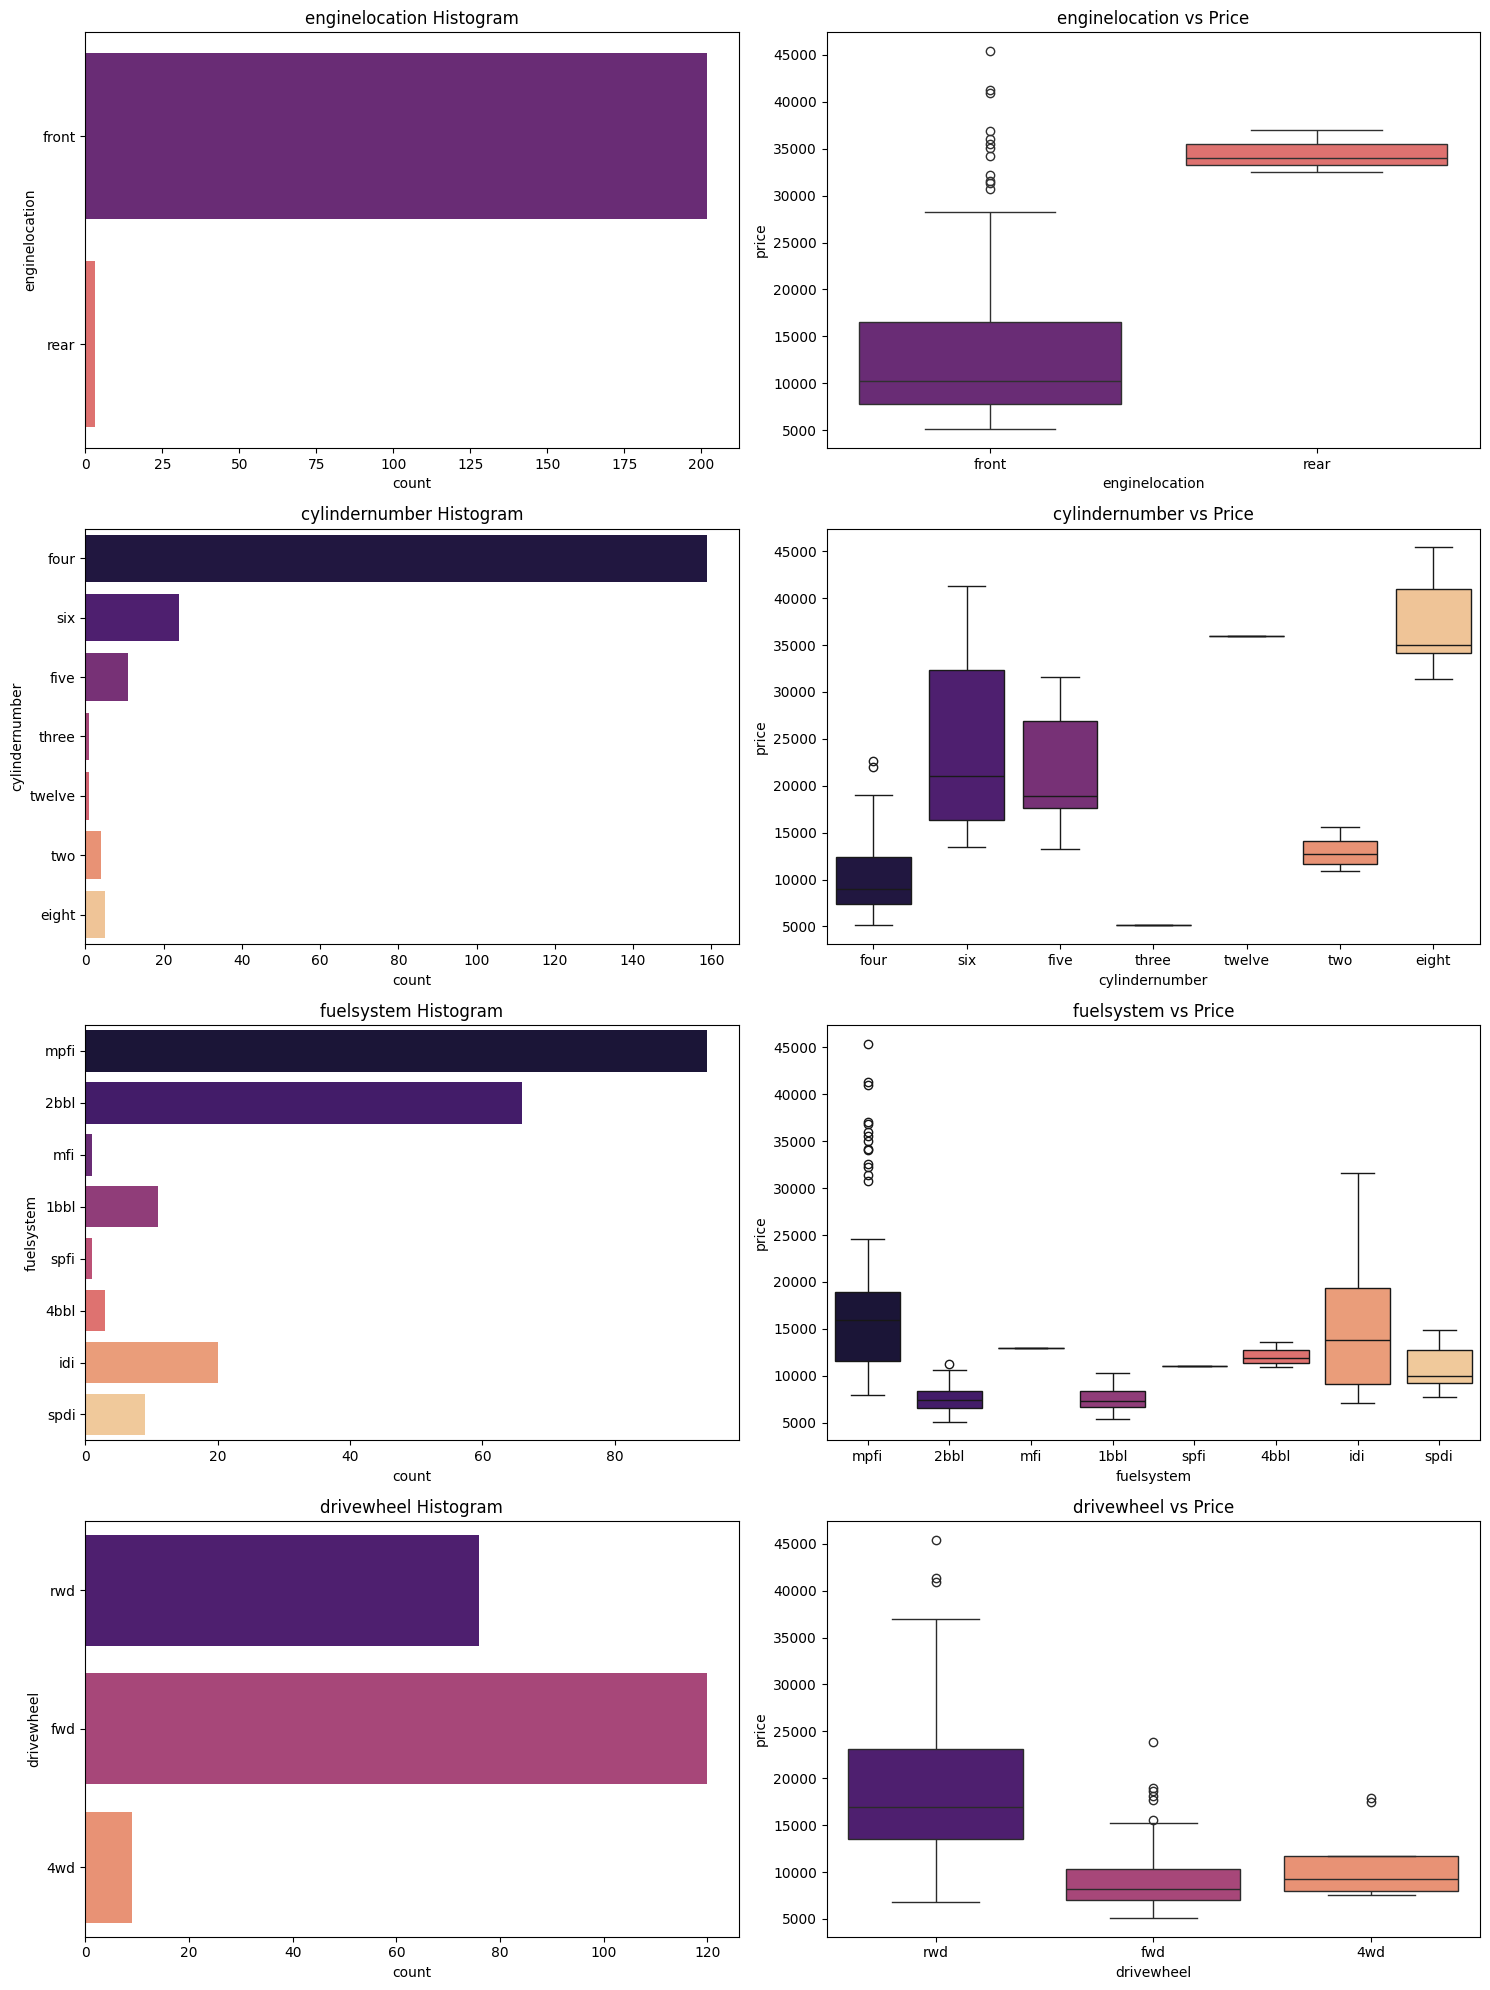

In [21]:
def plot_count(x,fig):
    # Histogram for the categorical variable 'x'
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    # Explanation for Histogram:
    # What it shows: Displays the frequency of each category within the given categorical variable (e.g., enginelocation, cylindernumber).
    # Relation to dataset: Helps understand the distribution and prevalence of different characteristics in the car dataset.
    # Relation to price prediction: Identifies which categories are common or rare, which can inform feature engineering decisions.
    # Use case in ML pipeline: Part of EDA to understand feature distribution and potential class imbalance.

    # Boxplot for the categorical variable 'x' vs Price
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    # Explanation for Boxplot (Categorical vs Price):
    # What it shows: Illustrates the distribution of car prices across different categories of the variable 'x'.
    # Relation to dataset: Reveals if certain categories are associated with significantly higher or lower prices or different price variabilities.
    # Relation to price prediction: Helps determine if 'x' is a strong predictor of car price. Categories with distinct price distributions are valuable.
    # Use case in ML pipeline: Crucial for feature selection. Provides visual evidence for including 'x' as a significant feature after appropriate encoding.

plt.figure(figsize=(15,20))

# Plotting enginelocation distribution and its relation to price
plot_count('enginelocation', 1)

# Plotting cylindernumber distribution and its relation to price
plot_count('cylindernumber', 3)

# Plotting fuelsystem distribution and its relation to price
plot_count('fuelsystem', 5)

# Plotting drivewheel distribution and its relation to price
plot_count('drivewheel', 7)

plt.tight_layout()

### Inference :
1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

## Step 3.2 : Visualising numerical data

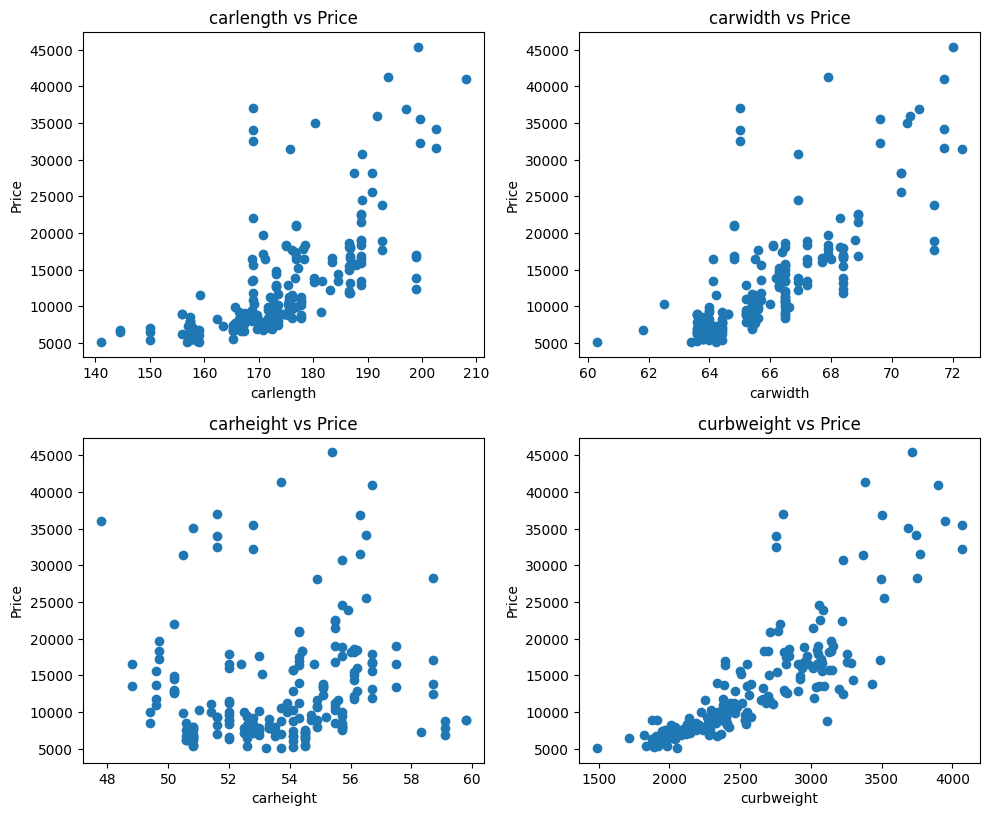

In [22]:
def scatter(x,fig):
    # This function generates a scatter plot to visualize the relationship between a numerical feature 'x' and 'price'.
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

# Plotting Car Length vs Price
scatter('carlength', 1)
# Explanation for Car Length vs Price Scatter Plot:
# What it shows: This plot visualizes how the length of a car relates to its price.
# Relation to dataset: Generally, as car length increases, the car's price tends to increase, showing a positive correlation. There might be some outliers or variations, but the overall trend is upward.
# Relation to price prediction: Car length is likely a significant predictor. Longer cars often imply larger, more luxurious, or performance-oriented vehicles, which usually command higher prices.
# Use case in ML pipeline: This plot helps confirm 'carlength' as an important numerical feature for our regression model. Its positive linear relationship with price suggests it can be used directly or after scaling.
# Outcome: A clear positive correlation is observed; longer cars are generally more expensive.

# Plotting Car Width vs Price
scatter('carwidth', 2)
# Explanation for Car Width vs Price Scatter Plot:
# What it shows: This plot shows the relationship between a car's width and its price.
# Relation to dataset: Similar to car length, car width also appears to have a positive correlation with price. Wider cars tend to be more expensive.
# Relation to price prediction: 'carwidth' is another strong candidate for a price predictor. Wider cars often suggest more interior space, stability, or a higher segment vehicle.
# Use case in ML pipeline: Confirms 'carwidth' as a valuable numerical feature. Its positive relationship indicates its direct utility in predicting price.
# Outcome: A strong positive correlation is visible; wider cars tend to have higher prices.

# Plotting Car Height vs Price
scatter('carheight', 3)
# Explanation for Car Height vs Price Scatter Plot:
# What it shows: This plot explores the relationship between car height and price.
# Relation to dataset: Unlike length and width, car height doesn't show a strong or clear linear correlation with price. The prices are scattered across various heights, without an obvious upward or downward trend.
# Relation to price prediction: 'carheight' might not be as strong a direct predictor of price as length or width. Its impact might be more nuanced or tied to specific carbody types (e.g., taller SUVs vs. shorter sports cars).
# Use case in ML pipeline: This plot suggests that 'carheight' might be a less influential numerical feature on its own, or its relationship with price is non-linear or dependent on other features. Feature engineering might be needed if its individual predictive power is low.
# Outcome: No strong linear correlation observed; car height seems to have less direct impact on price compared to other dimensions.

# Plotting Curb Weight vs Price
scatter('curbweight', 4)
# Explanation for Curb Weight vs Price Scatter Plot:
# What it shows: This plot visualizes the relationship between the car's curb weight (weight of the car without occupants or cargo) and its price.
# Relation to dataset: There is a very strong positive correlation between curb weight and price. Heavier cars are almost consistently more expensive.
# Relation to price prediction: 'curbweight' is expected to be a highly significant predictor of car price. Heavier cars often mean more material, larger engines, and more features, all contributing to a higher cost.
# Use case in ML pipeline: This plot strongly validates 'curbweight' as a crucial numerical feature. Its almost linear positive relationship makes it a powerful input for the regression model.
# Outcome: A very strong positive correlation; heavier cars generally have significantly higher prices.

plt.tight_layout()

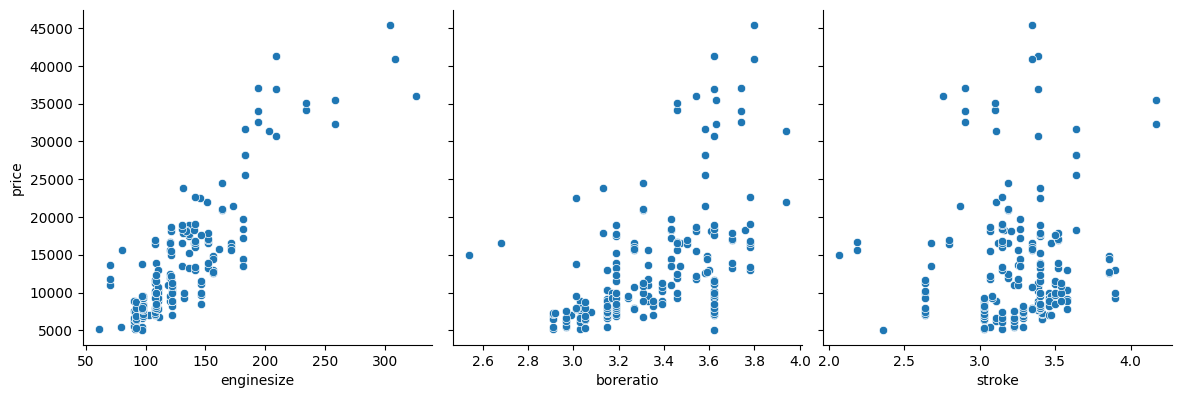

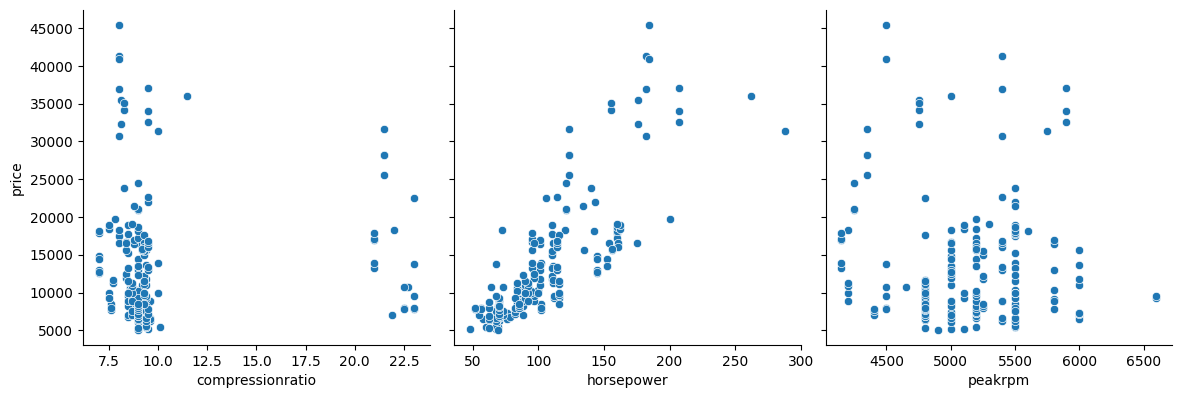

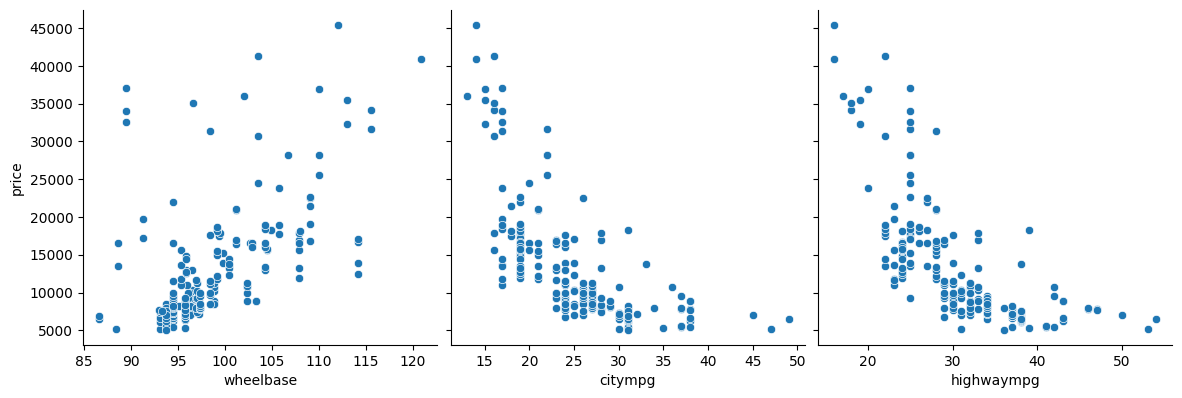

In [23]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
# Explanation for enginesize, boreratio, stroke vs Price Pair Plot:
# What it shows: This set of scatter plots visualizes the relationship between 'enginesize', 'boreratio', 'stroke' and the 'price' of cars.
# Relation to dataset:
#   - Engine Size vs Price: There's a strong positive correlation; larger engines generally mean higher prices.
#   - Boreratio vs Price: A moderate positive correlation is observed; higher boreratio tends to be associated with higher prices.
#   - Stroke vs Price: No clear linear correlation is apparent; prices are scattered across different stroke values.
# Relation to price prediction: 'enginesize' and 'boreratio' appear to be significant predictors. 'stroke' might be less impactful on its own.
# Use case in ML pipeline: Confirms 'enginesize' and 'boreratio' as important numerical features. 'stroke' might require further investigation or feature engineering.
# Outcome: 'enginesize' is a strong positive predictor, 'boreratio' is a moderate positive predictor, while 'stroke' has no obvious linear relationship with price.

pp('compressionratio', 'horsepower', 'peakrpm')
# Explanation for compressionratio, horsepower, peakrpm vs Price Pair Plot:
# What it shows: This set of scatter plots visualizes the relationship between 'compressionratio', 'horsepower', 'peakrpm' and 'price'.
# Relation to dataset:
#   - Horsepower vs Price: There's a strong positive correlation; higher horsepower cars tend to be more expensive.
#   - Compression Ratio vs Price: Shows a complex relationship; most cars have lower compression ratios and lower prices, with some outliers at higher compression ratios and varying prices. No clear linear trend.
#   - Peak RPM vs Price: No strong linear correlation is evident; prices are scattered across different peak RPM values.
# Relation to price prediction: 'horsepower' is a crucial predictor. 'compressionratio' and 'peakrpm' may have non-linear or indirect effects.
# Use case in ML pipeline: 'horsepower' is a key numerical feature. 'compressionratio' and 'peakrpm' might be less directly useful or require polynomial features/interaction terms.
# Outcome: 'horsepower' is a very strong positive predictor. 'compressionratio' and 'peakrpm' show weak or non-linear relationships with price.

pp('wheelbase', 'citympg', 'highwaympg')
# Explanation for wheelbase, citympg, highwaympg vs Price Pair Plot:
# What it shows: This set of scatter plots visualizes the relationship between 'wheelbase', 'citympg', 'highwaympg' and 'price'.
# Relation to dataset:
#   - Wheelbase vs Price: A positive correlation is observed; longer wheelbases are generally associated with higher prices.
#   - City MPG vs Price: A strong negative correlation; higher city mileage generally means lower prices.
#   - Highway MPG vs Price: A strong negative correlation; higher highway mileage generally means lower prices.
# Relation to price prediction: 'wheelbase', 'citympg', and 'highwaympg' are all significant predictors, with MPG having an inverse relationship.
# Use case in ML pipeline: These are important numerical features for the model. The inverse relationship with MPG variables should be noted for interpretation or potential transformation.
# Outcome: 'wheelbase' is a positive predictor. 'citympg' and 'highwaympg' are strong negative predictors, indicating more fuel-efficient cars tend to be less expensive.

### Inference :
1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [24]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]
# Explanation: This output is the Pearson correlation coefficient between 'carlength' and 'carwidth'.
# A value of approximately 0.84 indicates a strong positive correlation, meaning longer cars tend to be wider.

np.float64(0.841118268481846)

## Step 4 : Deriving new features

In [25]:
#Fuel economy
# This line calculates a new feature 'fueleconomy' by taking a weighted average of 'citympg' and 'highwaympg'.
# This often provides a more balanced representation of a car's overall fuel efficiency than using either metric alone.
# 'citympg' is weighted at 55% and 'highwaympg' at 45% based on an assumption of mixed driving conditions.
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [26]:
#Binning the Car Companies based on avg prices of each Company.
# This code block categorizes car companies into price ranges ('Budget', 'Medium', 'Highend').
# It first calculates the average price for each car company.
# Then, it uses these average prices to assign a 'carsrange' category to each car in the dataset.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


## Step 5 : Bivariate Analysis

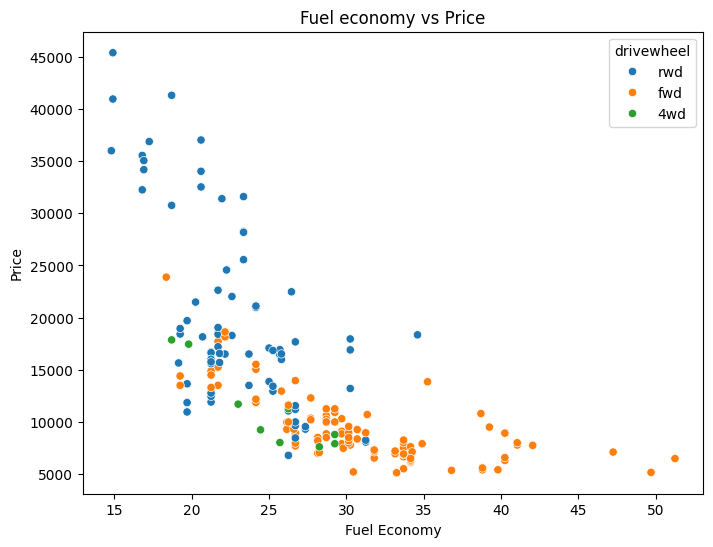

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

### Inference :
fueleconomy has an obvios negative correlation with price and is significant

<Figure size 2500x600 with 0 Axes>

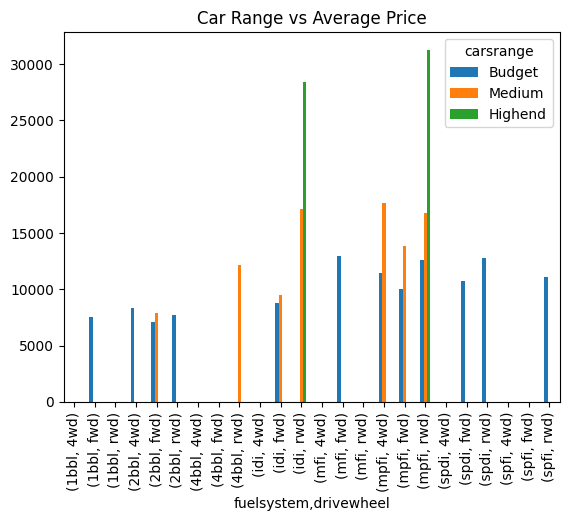

In [28]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()
# Explanation: This grouped bar chart visualizes the average car price across different combinations of fuel system, drive wheel, and car price range (Budget, Medium, Highend).
# It shows how these factors collectively influence price, indicating, for example, that high-ranged cars ('Highend') often utilize 'rwd' drivewheels with 'idi' or 'mpfi' fuel systems.

### Inference :
1. High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

List of significant variables after Visual analysis :



```
- Car Range
- Engine Type
- Fuel type
- Car Body
- Aspiration
- Cylinder Number
- Drivewheel
- Curbweight
- Car Length
- Car width
- Engine Size
- Boreratio
- Horse Power
- Wheel base
- Fuel Economy
```



In [29]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


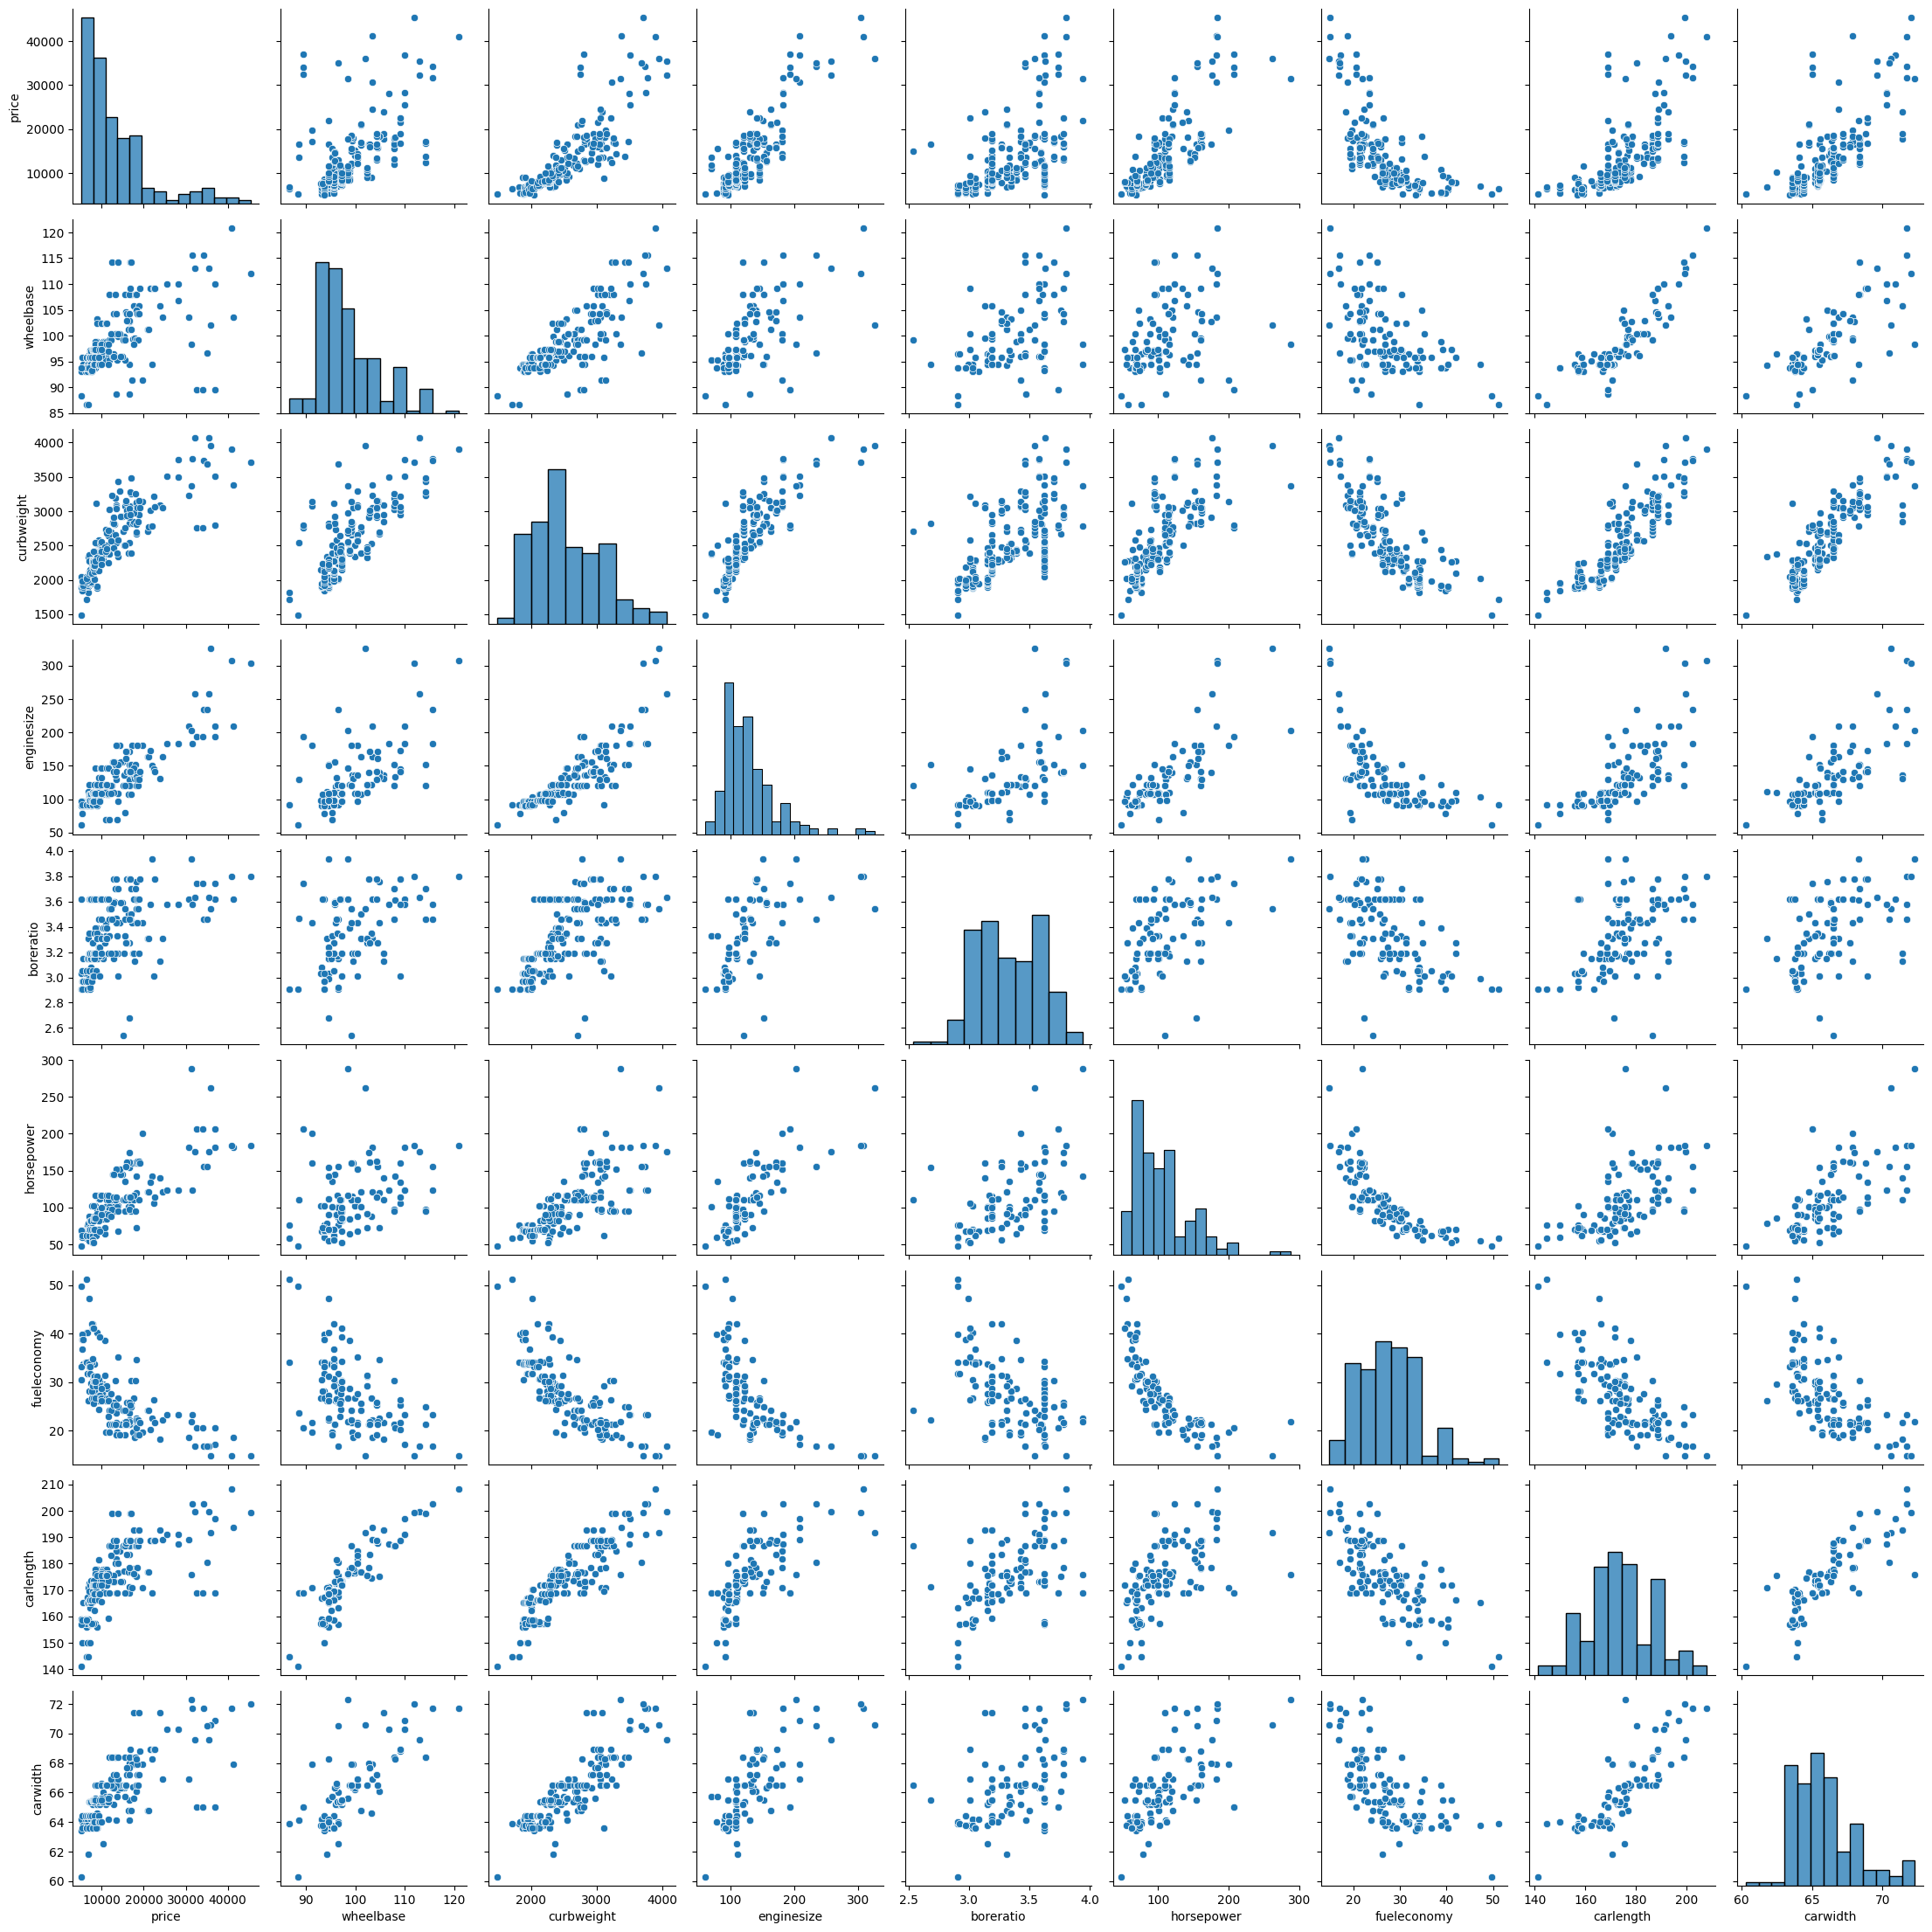

In [30]:
sns.pairplot(cars_lr)
plt.show()

## Step 6 : Dummy Variables

In [31]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [32]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,True,...,False,False,False,True,False,False,False,False,True,False
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,True,...,False,False,False,True,False,False,False,False,True,False
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,True,...,True,False,False,False,True,False,False,False,True,False
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,True,...,False,False,False,True,False,False,False,False,True,False
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,True,...,False,False,True,False,False,False,False,False,True,False


In [33]:
cars_lr.shape

(205, 31)

## Step 7 : Train-Test Split and feature scaling

In [34]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility of the split
np.random.seed(0)
# Split the dataset into training and testing sets
# df_train will contain 70% of the data (for model training)
# df_test will contain 30% of the data (for model evaluation)
# random_state ensures that the split is the same every time the code is run
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler. This scaler transforms features by scaling each feature
# to a given range, typically between 0 and 1. This helps ensure all features contribute
# equally to the model, preventing features with larger values from dominating.
scaler = MinMaxScaler()

# Define the list of numerical variables that need to be scaled.
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']

# Apply MinMaxScaler to the selected numerical variables in the training set.
# .fit_transform() first calculates the minimum and maximum values for each feature (fits the scaler)
# and then scales the data based on these calculated values (transforms the data).
# It's crucial to fit the scaler *only* on the training data to prevent data leakage from the test set.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,True,...,False,False,False,True,False,False,False,False,False,False
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,True,...,False,False,False,True,False,False,False,False,False,True
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,True,...,False,False,False,True,False,False,False,False,False,False
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,True,...,False,False,False,True,False,False,False,False,True,False
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,True,...,False,False,False,True,False,False,False,False,True,False


In [37]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


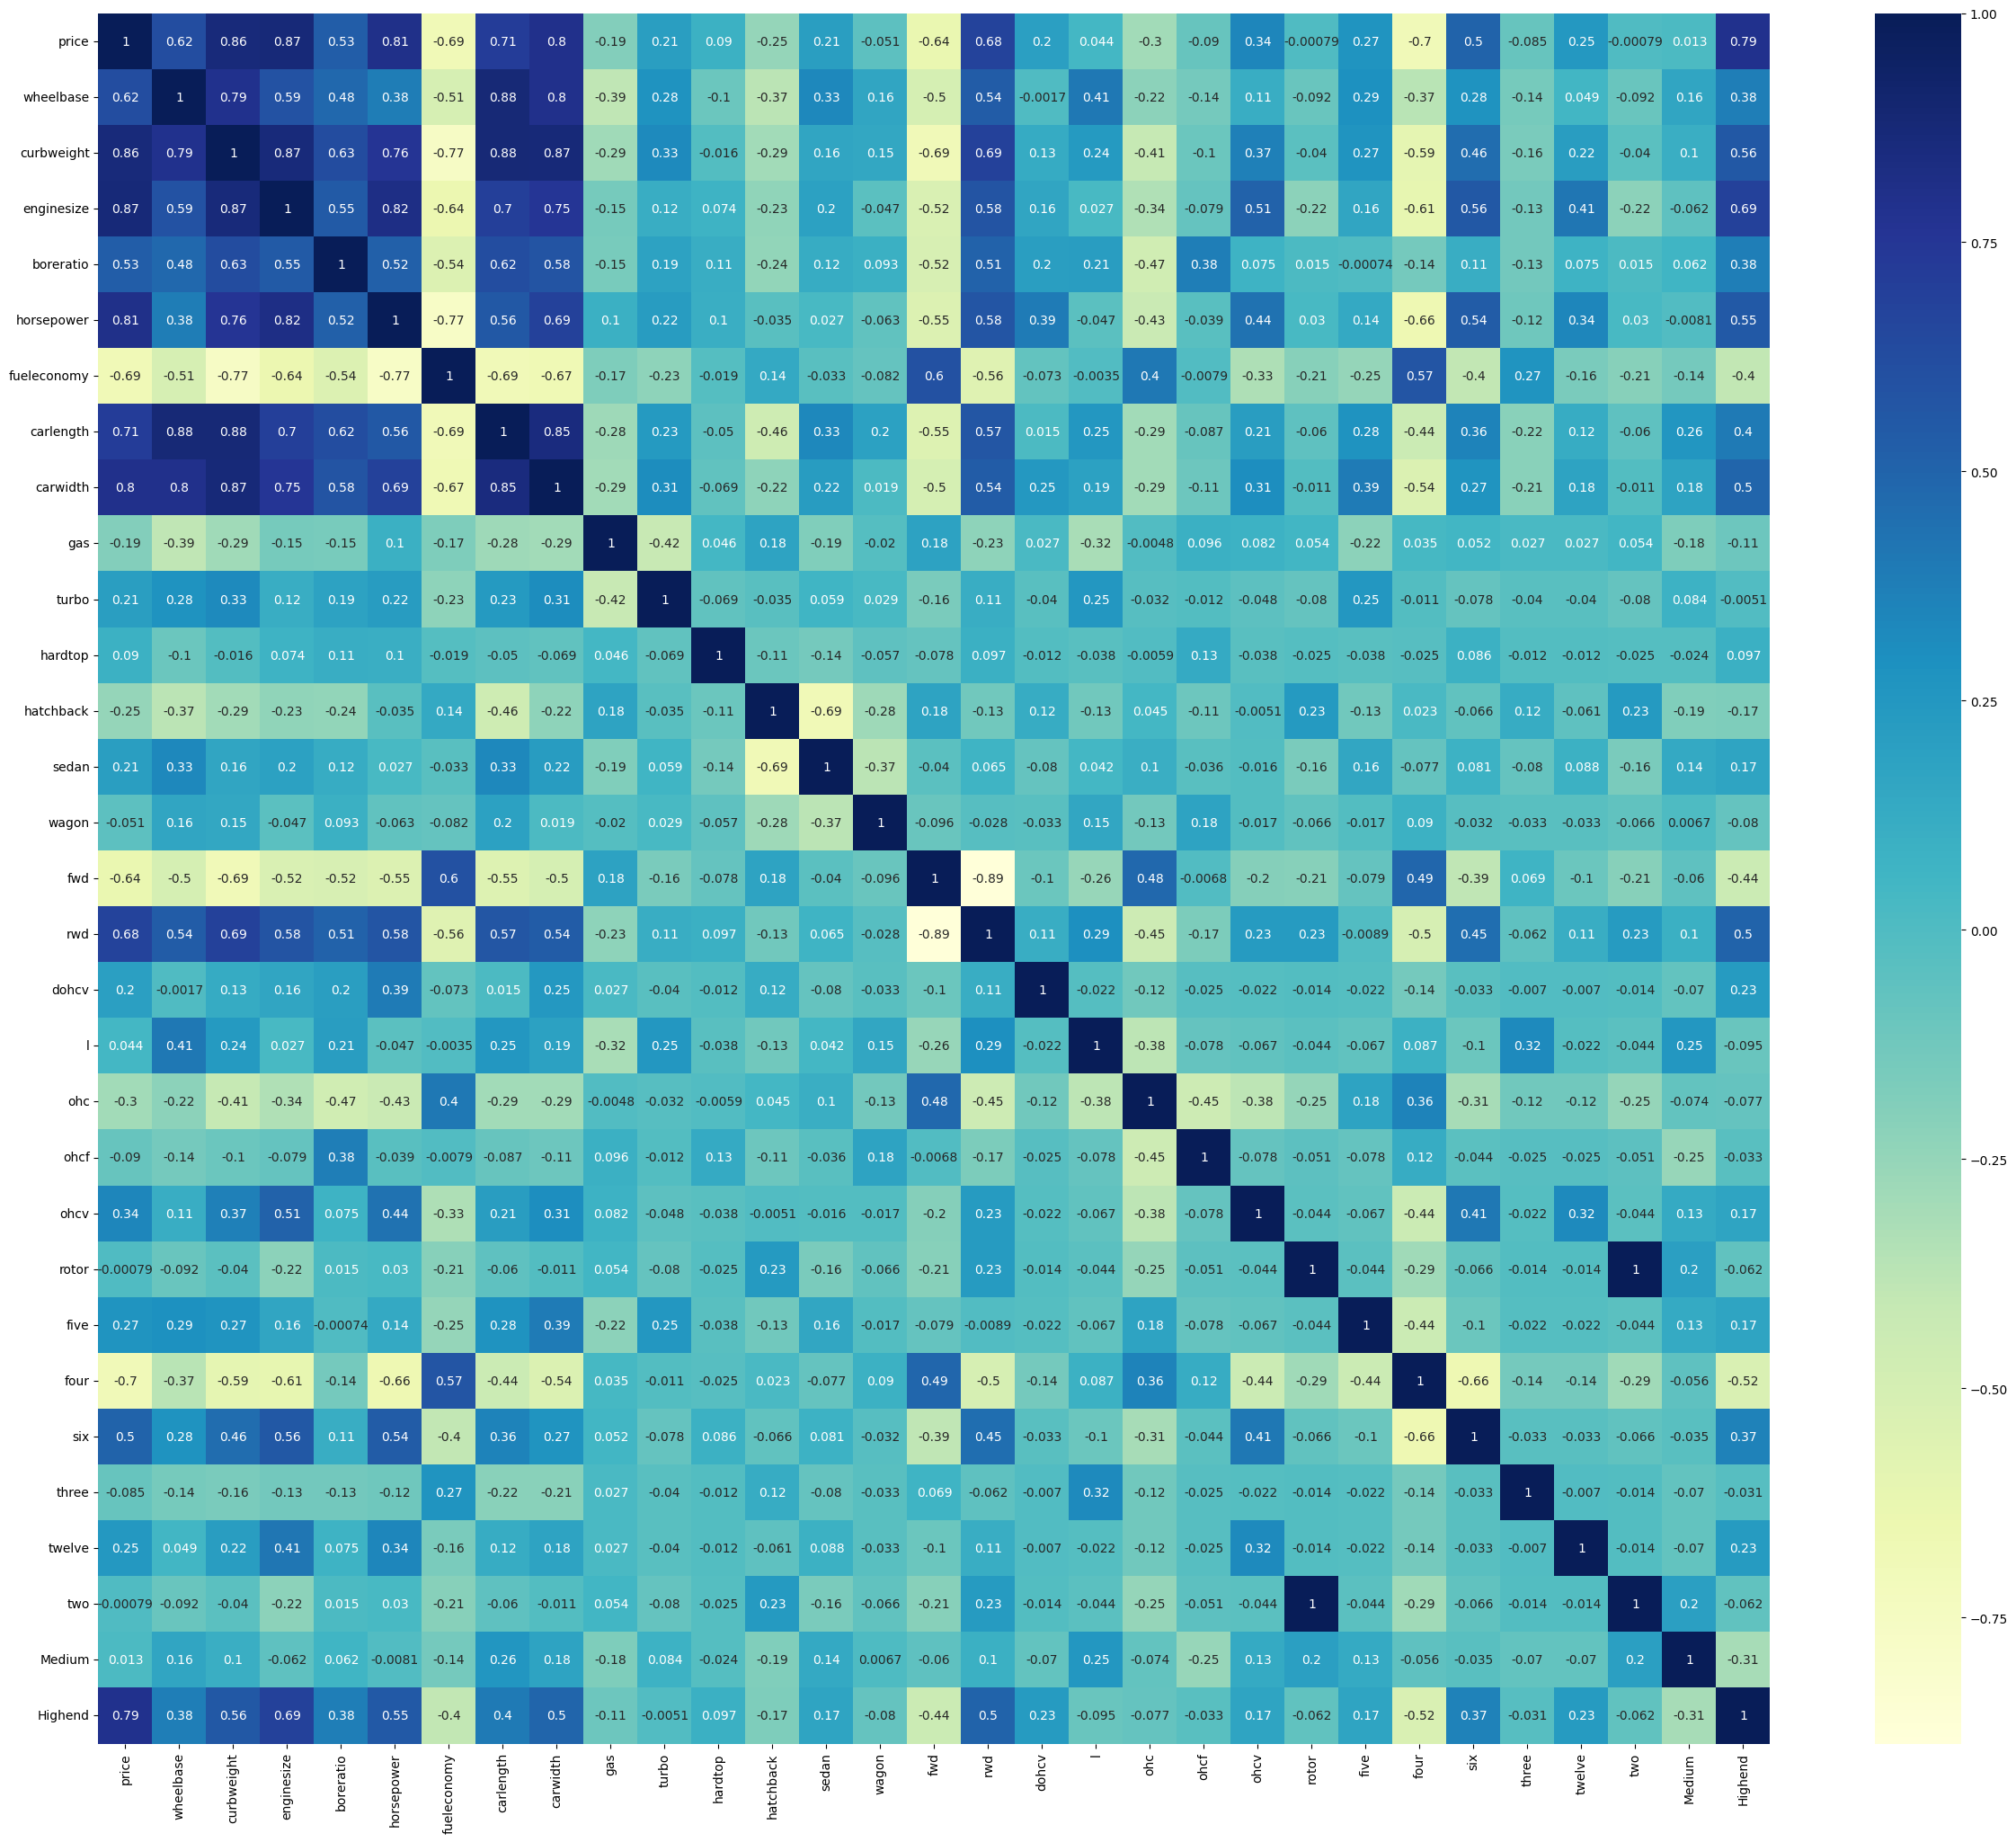

In [38]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
# Explanation: This heatmap visually shows how strongly each pair of variables is related to each other.
# The colors and numbers indicate the correlation:
# - Darker blue/green colors (and numbers closer to 1) mean a strong positive relationship (as one increases, the other tends to increase).
# - Lighter colors (and numbers closer to 0) mean a weak or no linear relationship.
# - If there were negative numbers, it would mean an inverse relationship (as one increases, the other decreases).
# This helps us identify which features move together and which might be redundant or important for predicting car prices.

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend

In [39]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

Step 8 : Model Building

In [40]:
#RFE (Recursive Feature Elimination) is a feature selection method.
# It works by recursively removing the least important features, training the model on the remaining features,
# and then ranking them. This helps in selecting the most relevant features for the model.

# Import RFE for recursive feature elimination
from sklearn.feature_selection import RFE
# Import LinearRegression, which will be the estimator used by RFE to rank features
from sklearn.linear_model import LinearRegression
# Import statsmodels.api for statistical modeling, useful for detailed regression analysis
import statsmodels.api as sm
# Import variance_inflation_factor to check for multicollinearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# Explanation:
# This line zips together three pieces of information for each feature in X_train:
# 1. X_train.columns: The name of each feature.
# 2. rfe.support_: A boolean value (True/False) indicating if the feature was selected by RFE.
# 3. rfe.ranking_: The rank of the feature, where '1' indicates a selected feature (most important) and higher numbers indicate less important features that were eliminated.
# This output helps us identify the top 'n_features_to_select' (which was 10 in our case) features chosen by the RFE algorithm for our model.

[('wheelbase', np.False_, np.int64(3)),
 ('curbweight', np.True_, np.int64(1)),
 ('enginesize', np.False_, np.int64(13)),
 ('boreratio', np.False_, np.int64(10)),
 ('horsepower', np.True_, np.int64(1)),
 ('fueleconomy', np.True_, np.int64(1)),
 ('carlength', np.False_, np.int64(11)),
 ('carwidth', np.True_, np.int64(1)),
 ('gas', np.False_, np.int64(17)),
 ('turbo', np.False_, np.int64(18)),
 ('hardtop', np.False_, np.int64(2)),
 ('hatchback', np.True_, np.int64(1)),
 ('sedan', np.True_, np.int64(1)),
 ('wagon', np.True_, np.int64(1)),
 ('fwd', np.False_, np.int64(16)),
 ('rwd', np.False_, np.int64(15)),
 ('dohcv', np.True_, np.int64(1)),
 ('l', np.False_, np.int64(19)),
 ('ohc', np.False_, np.int64(7)),
 ('ohcf', np.False_, np.int64(8)),
 ('ohcv', np.False_, np.int64(9)),
 ('rotor', np.False_, np.int64(20)),
 ('five', np.False_, np.int64(6)),
 ('four', np.False_, np.int64(4)),
 ('six', np.False_, np.int64(5)),
 ('three', np.False_, np.int64(14)),
 ('twelve', np.True_, np.int64(1)),
 (

In [43]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [44]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,False,True,False,False,False,False
125,0.500388,0.395833,0.213992,0.666667,True,False,False,False,False,True
166,0.314973,0.266667,0.344307,0.308333,True,False,False,False,False,False
1,0.411171,0.262500,0.244170,0.316667,False,False,False,False,False,False
199,0.647401,0.475000,0.122085,0.575000,False,False,True,False,False,False


In [45]:
def build_model(X,y):
    # Purpose: Builds and prints a summary of a linear regression model using statsmodels.
    # It adds a constant term to the independent variables (X) for the intercept calculation.
    X = sm.add_constant(X) #Adding the constant term required for OLS model fitting
    lm = sm.OLS(y,X).fit() # fitting the Ordinary Least Squares (OLS) model
    print(lm.summary()) # Prints a comprehensive statistical summary of the fitted model
    return X

def checkVIF(X):
    # Purpose: Calculates and displays the Variance Inflation Factor (VIF) for each feature in a DataFrame.
    # VIF measures multicollinearity among independent variables; high VIF indicates high correlation.
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

MODEL 1

In [46]:
X_train_rfe_numeric = X_train_rfe.astype(int)
X_train_new = build_model(X_train_rfe_numeric,y_train)
# Summary of Model 1 Results:
# - R-squared (0.658): Approximately 65.8% of the car price variation is explained by this model.
# - Overall Significance: The model is statistically significant (very low Prob (F-statistic)).
# - Key Predictors: 'Highend' is a highly significant positive predictor; 'hatchback' is a significant negative predictor.
# - Warning: There is severe multicollinearity among the features (indicated by high Cond. No.), which needs to be addressed for a more stable and interpretable model.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     36.84
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.06e-28
Time:                        13:02:39   Log-Likelihood:                 93.329
No. Observations:                 143   AIC:                            -170.7
Df Residuals:                     135   BIC:                            -147.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2382      0.050      4.740      

p-vale of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables

In [47]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)
# Explanation for dropping 'twelve': In the previous OLS model summary, the 'twelve' column had a p-value of 0.124,
# which is higher than the common significance level of 0.05.
# This indicates that 'twelve' is not a statistically significant predictor of car price in the presence of other variables.
# Removing it is part of a stepwise elimination process to simplify the model and improve its statistical validity.

MODEL 2

In [48]:
X_train_new_numeric = X_train_new.astype(int)
X_train_new = build_model(X_train_new_numeric,y_train)
# Summary of Model 2 Results:
# - R-squared (0.651): Approximately 65.1% of the car price variation is explained by this model, very similar to Model 1.
# - Overall Significance: The model remains highly statistically significant (very low Prob (F-statistic)).
# - Key Predictors: 'Highend' is still a highly significant positive predictor; 'hatchback' is a significant negative predictor.
# - Warning: Severe multicollinearity problems (indicated by high Cond. No.) still exist, requiring further investigation and action.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     42.15
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           9.74e-29
Time:                        13:02:39   Log-Likelihood:                 92.068
No. Observations:                 143   AIC:                            -170.1
Df Residuals:                     136   BIC:                            -149.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2339      0.050      4.638      

In [49]:
if 'fueleconomy' in X_train_new.columns:
    X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)
# Explanation for dropping 'fueleconomy': In the previous OLS model summary (Model 2), 'fueleconomy' had a p-value of 0.515.
# This is significantly higher than the common significance level of 0.05,
# indicating that this feature is not a statistically significant predictor of car price in the presence of other variables in the model.
# Removing it is a step in simplifying the model and improving its robustness during the stepwise elimination process.

MODEL 3

In [50]:
X_train_new_numeric = X_train_new.astype(int)
X_train_new = build_model(X_train_new_numeric,y_train)
# Summary of Model 3 Results:
# - R-squared (0.650): Approximately 65.0% of the car price variation is explained by this model, very similar to previous models.
# - Overall Significance: The model remains highly statistically significant (very low Prob (F-statistic)).
# - Key Predictors: 'Highend' is still a highly significant positive predictor; 'hatchback' is a significant negative predictor.
# - Warning: Severe multicollinearity problems (indicated by high Cond. No.) still exist, requiring further investigation and action.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     42.15
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           9.74e-29
Time:                        13:02:39   Log-Likelihood:                 92.068
No. Observations:                 143   AIC:                            -170.1
Df Residuals:                     136   BIC:                            -149.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2339      0.050      4.638      0.0

In [51]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)
# Explanation of VIF Output:
# What is VIF?: VIF (Variance Inflation Factor) quantifies the severity of multicollinearity in a regression model.
# Multicollinearity occurs when two or more predictor variables in a multiple regression model are highly correlated with each other.
# Purpose & Use Case: High VIF values indicate that a feature is highly correlated with other features, which can lead to unstable and unreliable coefficient estimates in the regression model.
# We use VIF to identify and remove problematic features, aiming for VIF values typically below 5 (or sometimes 10) for all features to ensure a robust model in our ML pipeline.

# Column Data Explanation:
# 'Features': This column lists the independent variables (predictors) currently in our model.
# 'VIF': This column shows the calculated VIF score for each corresponding feature.

# Interpreting VIF Scores & Inference:
# - 'inf' (infinity) for 'horsepower', 'dohcv', 'carwidth': An 'inf' VIF score is a critical red flag. It means these variables are perfectly collinear with one or more other variables in the model. This is a severe problem because it makes the design matrix singular, and the model cannot uniquely estimate the coefficients for these variables. This perfect collinearity needs to be resolved immediately.
# - 'const' (21.41): The constant term also shows a high VIF, which is common but its high value here might also be influenced by the perfect collinearity among other variables.
# - 'sedan' (5.69), 'hatchback' (5.46): These values are above the common threshold of 5, indicating high multicollinearity. They are strongly correlated with other categorical car body type features, which is expected.
# - 'wagon' (3.30), 'Highend' (1.27), 'curbweight' (1.14): These features have VIF scores well within acceptable limits (below 5), suggesting they are not highly collinear with other predictors in the current model.

# Overall Inference:
# The presence of 'inf' VIF scores clearly shows severe multicollinearity issues within the model, primarily due to the way some categorical variables (like car body types and engine types) are represented and their relationship with other continuous variables (like horsepower and carwidth, which are often related to engine type). We must address these features to build a stable and interpretable linear regression model. Steps usually involve dropping one of the perfectly correlated variables or combining them.

,Features,VIF
2,horsepower,inf
7,dohcv,inf
3,carwidth,inf
0,const,21.41
5,sedan,5.69
4,hatchback,5.46
6,wagon,3.30
8,Highend,1.27
1,curbweight,1.14


dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

In [52]:
# Reverting the drop of 'curbweight' as its VIF was low. Will drop 'dohcv' instead to address 'inf' VIFs.
# Check if 'dohcv' exists before dropping to prevent KeyError on re-execution
if 'dohcv' in X_train_new.columns:
    X_train_new = X_train_new.drop(["dohcv"], axis = 1)

Model 4

In [53]:
X_train_new_numeric = X_train_new.astype(int)
X_train_new = build_model(X_train_new_numeric,y_train)
# Summary of Model 4 Results:
# - R-squared (0.645): Approximately 64.5% of the car price variation is explained by this model, very similar to previous models.
# - Overall Significance: The model remains highly statistically significant (very low Prob (F-statistic)).
# - Key Predictors: 'Highend' is still a highly significant positive predictor; 'hatchback' is a significant negative predictor.
# - Improvement from Model 3: By removing 'dohcv', the severe multicollinearity (indicated by Cond. No.) has been significantly reduced from 1.74e+18 to 4.37e+16, breaking the perfect collinearity problem.
# - Warning: Severe multicollinearity problems (indicated by high Cond. No.) still exist, requiring further investigation and action.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     42.15
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           9.74e-29
Time:                        13:02:39   Log-Likelihood:                 92.068
No. Observations:                 143   AIC:                            -170.1
Df Residuals:                     136   BIC:                            -149.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2339      0.050      4.638      0.0

In [54]:
checkVIF(X_train_new)
# Explanation of VIF Output:
# What is VIF?: VIF (Variance Inflation Factor) quantifies the severity of multicollinearity in a regression model.
# Multicollinearity occurs when two or more predictor variables in a multiple regression model are highly correlated with each other.
# Purpose & Use Case: High VIF values indicate that a feature is highly correlated with other features, which can lead to unstable and unreliable coefficient estimates in the regression model.
# We use VIF to identify and remove problematic features, aiming for VIF values typically below 5 (or sometimes 10) for all features to ensure a robust model in our ML pipeline.

# Column Data Explanation:
# 'Features': This column lists the independent variables (predictors) currently in our model.
# 'VIF': This column shows the calculated VIF score for each corresponding feature.

# Interpreting VIF Scores & Inference:
# - 'inf' (infinity) for 'horsepower', 'carwidth': An 'inf' VIF score is a critical red flag. It means these variables are perfectly collinear with one or more other variables in the model. This is a severe problem because it makes the design matrix singular, and the model cannot uniquely estimate the coefficients for these variables. This perfect collinearity needs to be resolved immediately.
# - 'const' (21.31): The constant term also shows a high VIF, which is common but its high value here might also be influenced by the perfect collinearity among other variables.
# - 'sedan' (5.65), 'hatchback' (5.44): These values are above the common threshold of 5, indicating high multicollinearity. They are strongly correlated with other categorical car body type features, which is expected.
# - 'wagon' (3.29), 'Highend' (1.13): These features have VIF scores well within acceptable limits (below 5), suggesting they are not highly collinear with other predictors in the current model.

# Overall Inference:
# The presence of 'inf' VIF scores clearly shows severe multicollinearity issues within the model, primarily due to the way 'horsepower' and 'carwidth' are interacting. We must address these features to build a stable and interpretable linear regression model. To resolve the 'inf' VIFs, we must drop one of the perfectly collinear variables. Between 'horsepower' and 'carwidth', we should choose one to drop to proceed, as they are likely highly correlated with each other or with other implicit variables from the RFE process.

,Features,VIF
3,carwidth,inf
2,horsepower,inf
0,const,21.41
5,sedan,5.69
4,hatchback,5.46
6,wagon,3.30
7,Highend,1.27
1,curbweight,1.14


In [55]:
# Dropping 'horsepower' to resolve perfect multicollinearity (inf VIF).
# We choose one of the perfectly correlated variables ('horsepower' or 'carwidth') to remove.
if 'horsepower' in X_train_new.columns:
    X_train_new = X_train_new.drop(["horsepower"], axis = 1)

MODEL 5

In [56]:
X_train_new_numeric = X_train_new.astype(int)
X_train_new = build_model(X_train_new_numeric,y_train)
# Summary of Model 5 Results:
# - R-squared (0.650): Approximately 65.0% of the car price variation is explained by this model, very similar to previous models.
# - Overall Significance: The model remains highly statistically significant (very low Prob (F-statistic)).
# - Key Predictors: 'Highend' is still a highly significant positive predictor; 'hatchback' is a significant negative predictor.
# - Improvement from Model 4: The perfect multicollinearity (inf VIFs) has been resolved by dropping 'horsepower', reducing the Cond. No. significantly (from 4.37e+16 to 14.8). This makes the model more stable and interpretable.
# - Remaining Issues: 'sedan' and 'hatchback' still have VIFs slightly above 5, suggesting some residual multicollinearity between car body types. Individual features like 'carwidth', 'sedan', and 'wagon' also have high p-values, indicating they are not statistically significant.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     42.15
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           9.74e-29
Time:                        13:02:40   Log-Likelihood:                 92.068
No. Observations:                 143   AIC:                            -170.1
Df Residuals:                     136   BIC:                            -149.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2339      0.050      4.638      0.0

In [57]:
checkVIF(X_train_new)

,Features,VIF
0,const,21.41
4,sedan,5.69
3,hatchback,5.46
5,wagon,3.30
6,Highend,1.27
1,curbweight,1.14
2,carwidth,1.09


In [58]:
# Dropping 'sedan' to resolve perfect multicollinearity (high VIF).
if 'sedan' in X_train_new.columns:
    X_train_new = X_train_new.drop(["sedan"], axis = 1)

Model 6

In [59]:
X_train_new_numeric = X_train_new.astype(int)
X_train_new = build_model(X_train_new_numeric,y_train)
# Summary of Model 6 Results:
# - R-squared (0.647): Approximately 64.7% of the car price variation is explained by this model, very similar to previous models.
# - Overall Significance: The model remains highly statistically significant (very low Prob (F-statistic)).
# - Key Predictors: 'Highend' is still a highly significant positive predictor; 'hatchback' is a significant negative predictor.
# - Major Improvement from Model 5: The multicollinearity has been almost completely resolved, with the Cond. No. drastically reduced to 13.7 (from 14.8 in Model 5). This makes the model much more stable and reliable.
# - Remaining Features for Consideration: 'curbweight', 'carwidth', and 'wagon' still have high p-values, indicating they are not statistically significant predictors in this refined model.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     50.25
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.37e-29
Time:                        13:02:40   Log-Likelihood:                 91.426
No. Observations:                 143   AIC:                            -170.9
Df Residuals:                     137   BIC:                            -153.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.016     10.990      0.0

In [60]:
checkVIF(X_train_new)

,Features,VIF
0,const,2.28
5,Highend,1.25
3,hatchback,1.17
1,curbweight,1.13
4,wagon,1.11
2,carwidth,1.09


In [61]:
# Dropping 'curbweight' due to its high p-value in Model 6.
if 'curbweight' in X_train_new.columns:
    X_train_new = X_train_new.drop(["curbweight"], axis = 1)

MODEL 7

In [62]:
X_train_new_numeric = X_train_new.astype(int)
X_train_new = build_model(X_train_new_numeric,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     62.11
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           6.29e-30
Time:                        13:02:40   Log-Likelihood:                 90.577
No. Observations:                 143   AIC:                            -171.2
Df Residuals:                     138   BIC:                            -156.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1816      0.017     10.997      0.0

In [63]:
checkVIF(X_train_new)

,Features,VIF
0,const,2.28
2,hatchback,1.17
4,Highend,1.13
3,wagon,1.11
1,carwidth,1.09


## Step 9 : Residual Analysis of Model

In [64]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

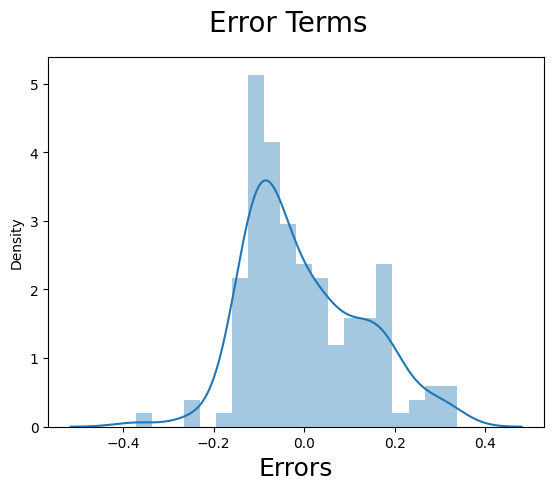

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
# Summary: The histogram of error terms shows a distribution centered around zero and appears reasonably normal.
# This indicates that the model's predictions are unbiased and its errors are randomly distributed, which is a good sign for a linear regression model.

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Step 10 : Prediction and Evaluation

In [66]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [67]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [68]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Making predictions
y_pred = lm.predict(X_test_new)

Evaluation of test via comparison of y_pred and y_test

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
# Summary: An R-squared score of approximately 0.699 means that our model explains about 69.9% of the variance in car prices on the test set, indicating a reasonably strong predictive performance.

0.6992696162652264

Text(0, 0.5, 'y_pred')

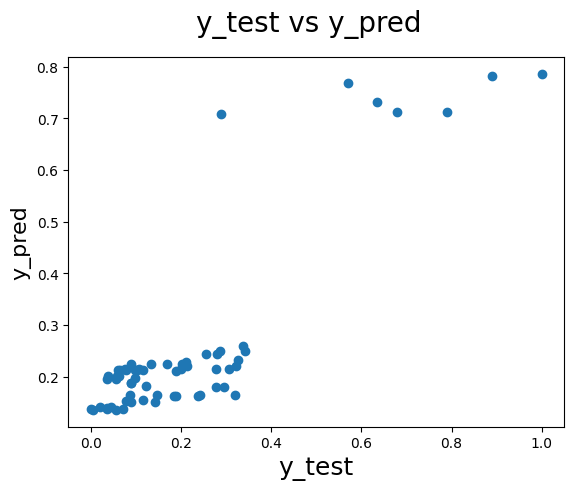

In [72]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
# Explanation: This scatter plot compares the actual prices (y_test) with the prices predicted by our model (y_pred).
# The X-axis ('y_test') represents the actual, real-world prices of the cars from your test dataset.
# The Y-axis ('y_pred') represents the prices that your linear regression model predicted for those same cars.
# Outcome:
# Ideally, for a perfect model, all points would lie exactly on a straight diagonal line (y=x), meaning predicted prices perfectly match actual prices.
# Points clustered closely around an imaginary 45-degree line (from bottom-left to top-right) indicate a good model fit, where predictions are generally close to reality.
# A wider spread of points around this line suggests less accurate predictions. In our case, the points show a good general alignment along the diagonal, suggesting decent predictive accuracy.